# Example using netcdf-scm

Grabbed from example notebook by Zeb Nicholls: see https://gitlab.com/netcdf-scm/calibration-data/-/blob/master/notebooks/plotting/ecs-diagnosis.ipynb

In [3]:
import datetime as dt
import glob
import os.path
import requests
import shutil
import zipfile

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import netcdf_scm.io
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm
from openscm_units import unit_registry
from patsy import dmatrices
from scmdata import ScmRun, run_append

/Users/chris/anaconda3/envs/cmip6-examples/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
def find_file(srch):
    found_files = set(glob.glob(srch, recursive=True))
    if len(found_files) != 1:
        print("Not all data available for {}".format(srch))
        print(found_files)
        return None

    return list(found_files)[0]

## Download the data

First we need to download the tas, rsut, rlut and rsdt data for the abrupt-\*CO2 experiments. Here we want to use the normalised data i.e. timeseries which are anomalies from a 21-year running mean of the piControl. We also use the annual-mean data.

In [5]:
FORCE_DOWNLOAD = True

In [6]:
DATA_DIR = os.path.join(".", "ecs_data")
DATA_DIR

'./ecs_data'

In [7]:
zip_file = os.path.join(".", "ecs_data.zip")
zip_file

'./ecs_data.zip'

In [9]:
experiments_to_download = (
    "abrupt-4xCO2",
    "abrupt4xCO2",
    "abrupt-2xCO2",
    "abrupt-0p5xCO2",
)

variables_to_download = (
    "tas",
    "rsut",
    "rlut",
    "rsdt",
)

if FORCE_DOWNLOAD:
    if os.path.isdir(DATA_DIR):
        shutil.rmtree(DATA_DIR)

if not os.path.isdir(DATA_DIR):
    print("Downloading ECS relevant data")
    for exp in tqdm(experiments_to_download, desc="experiment"):
        for var in tqdm(variables_to_download, desc="variable"):
            params = (
                ("experiment_id", exp),
                ("variable_id", var),
                ("normalised", "21-yr-running-mean"),
                ("timeseriestype", "average-year-mid-year"),
            )
            url = "https://cmip6.science.unimelb.edu.au/api/v1/download_zip"
            r = requests.get(url, params=params)
            r.raise_for_status()

            with open(zip_file, "wb") as f:
                f.write(r.content)

            zip_ref = zipfile.ZipFile(zip_file, "r")
            zip_ref.extractall(DATA_DIR)
            zip_ref.close()

experiment: 100%|█████████████████████████████████| 4/4 [02:02<00:00, 30.51s/it]


## Making plots

In [10]:
abrupt_4xco2_tas_files = sorted(
    glob.glob(
        os.path.join(
            DATA_DIR,
            "**",
            "average-year-mid-year",
            "**",
            "NORMED*tas*abrupt*4xCO2*.MAG",
        ),
        recursive=True,
    )
)
len(abrupt_4xco2_tas_files)

136

  0%|          | 0/136 [00:00<?, ?it/s]

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/AWI/AWI-CM-1-1-MR/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20191015/**/NORMED*.MAG
set()
Not all data available for AWI-CM-1-1-MR r1i1p1f1
Missing abrupt-2xCO2


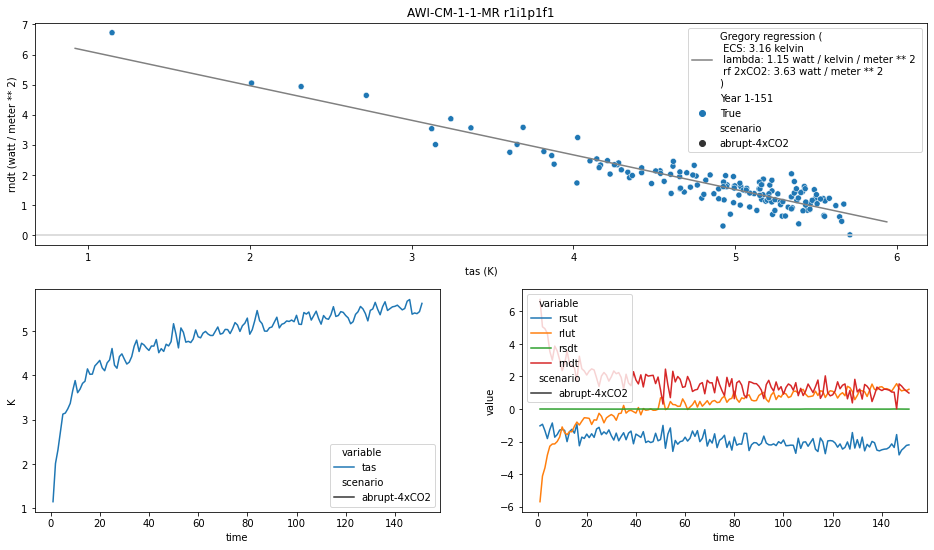

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/BCC/BCC-CSM2-MR/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20181016/**/NORMED*.MAG
set()
Not all data available for BCC-CSM2-MR r1i1p1f1
Missing abrupt-2xCO2


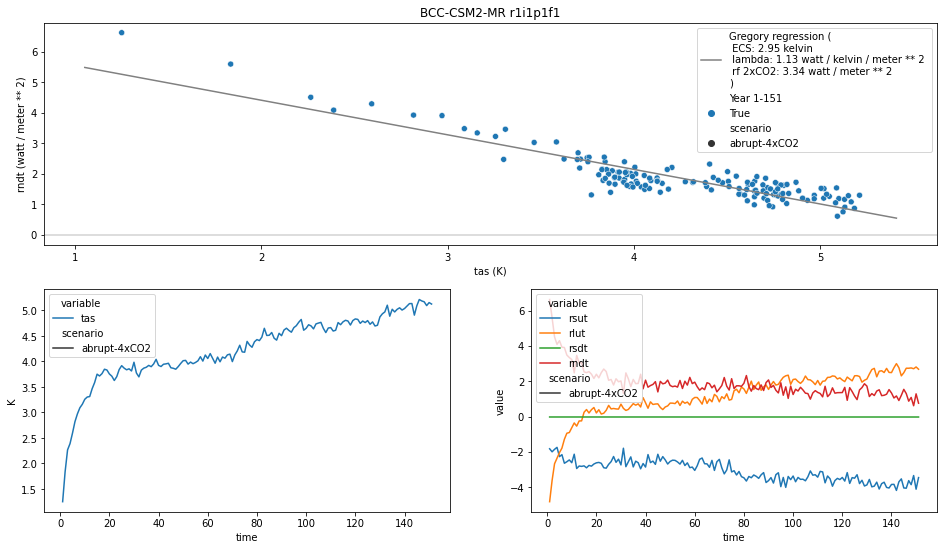

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/BCC/BCC-ESM1/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190613/**/NORMED*.MAG
set()
Not all data available for BCC-ESM1 r1i1p1f1
Missing abrupt-2xCO2


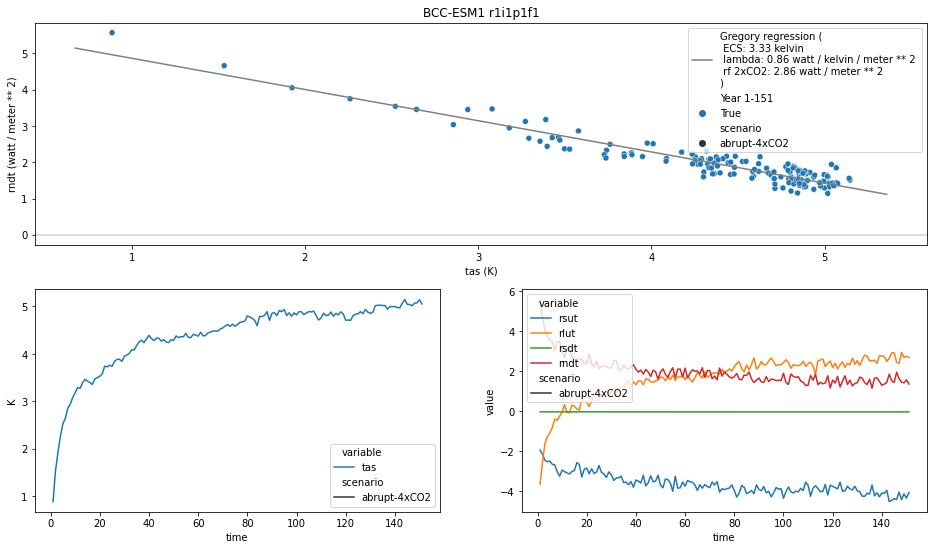

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CAMS/CAMS-CSM1-0/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190708/**/NORMED*.MAG
set()
Not all data available for CAMS-CSM1-0 r1i1p1f1
Missing abrupt-2xCO2


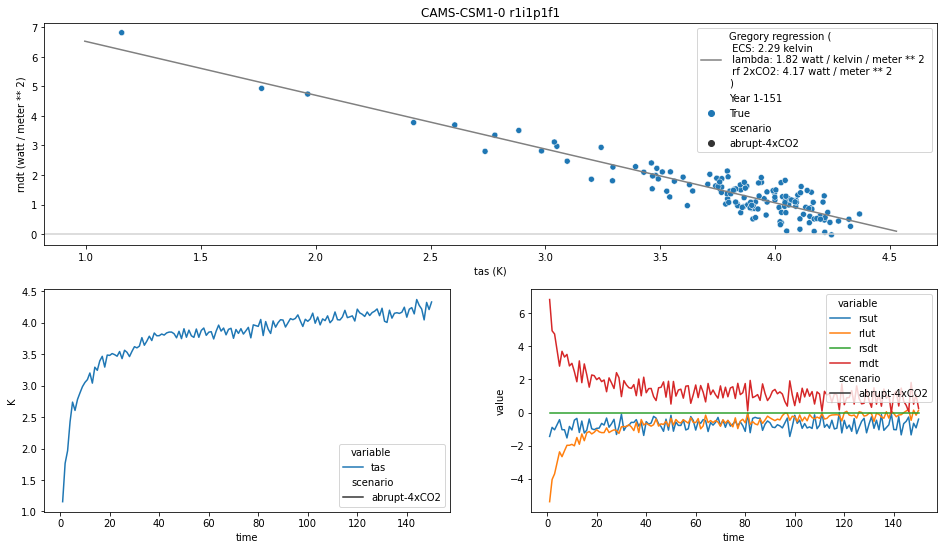

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CAMS/CAMS-CSM1-0/abrupt-2xCO2/r2i1p1f1/Amon/tas/gn/v20190726/**/NORMED*.MAG
set()
Not all data available for CAMS-CSM1-0 r2i1p1f1
Missing abrupt-2xCO2


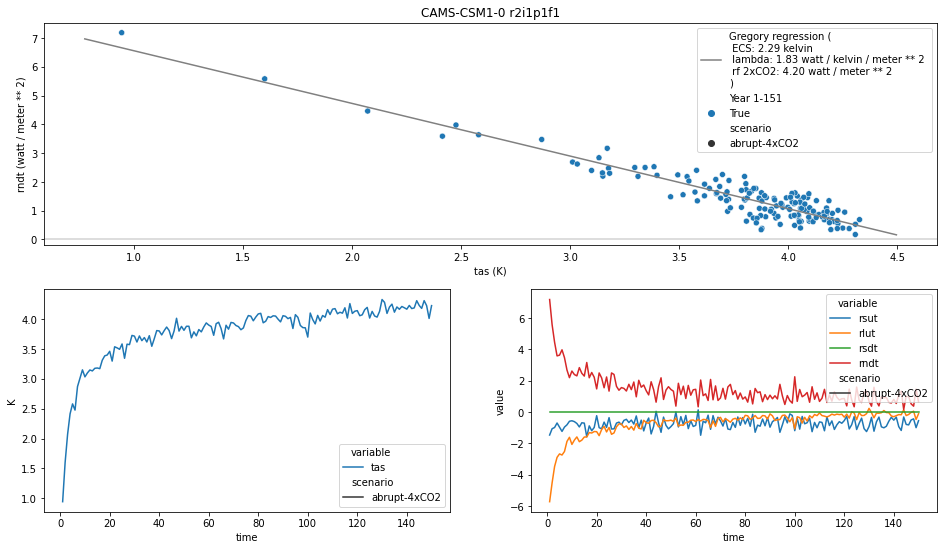

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CAS/FGOALS-g3/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20191230/**/NORMED*.MAG
set()
Not all data available for FGOALS-g3 r1i1p1f1
Missing abrupt-2xCO2


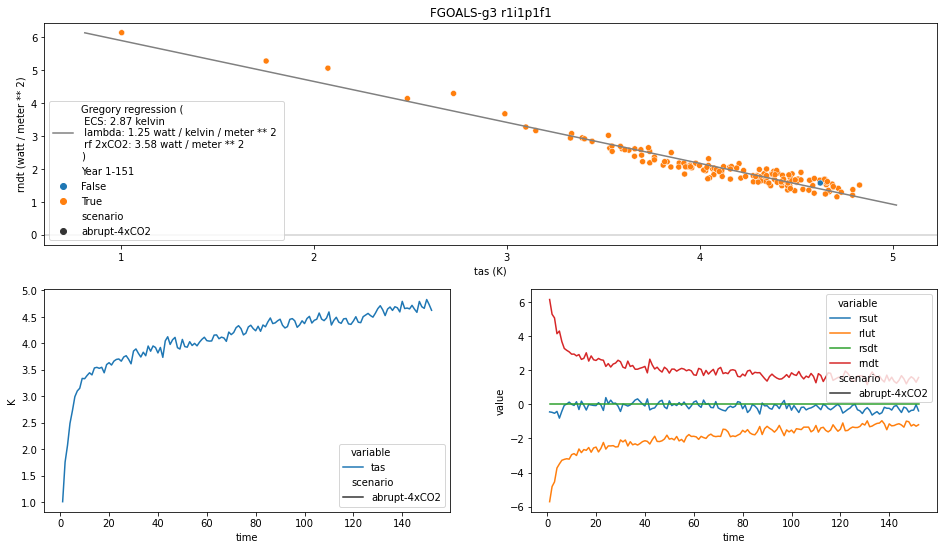

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CCCma/CanESM5/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190429/**/NORMED*.MAG
set()
Not all data available for CanESM5 r1i1p1f1
Missing abrupt-2xCO2


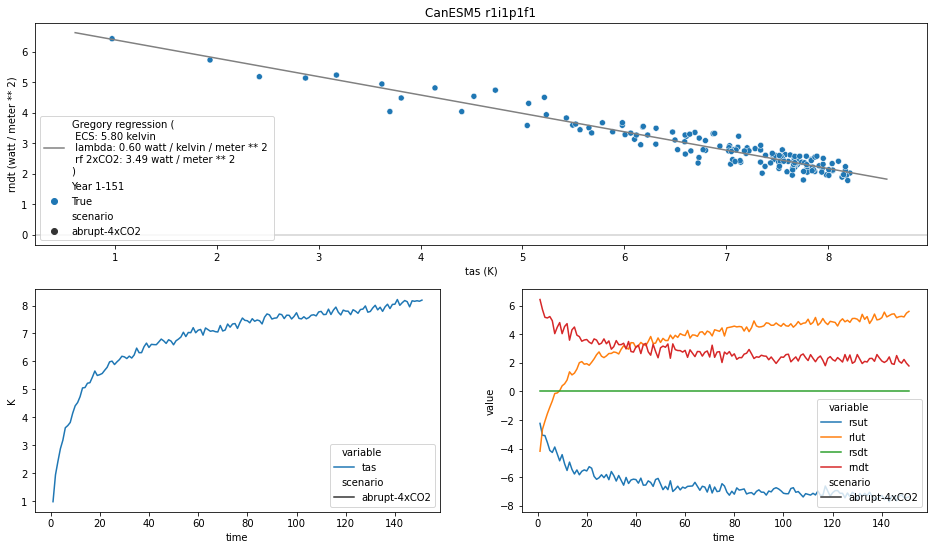

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CCCma/CanESM5/abrupt-2xCO2/r1i1p2f1/Amon/tas/gn/v20190429/**/NORMED*.MAG
set()
Not all data available for CanESM5 r1i1p2f1
Missing abrupt-2xCO2


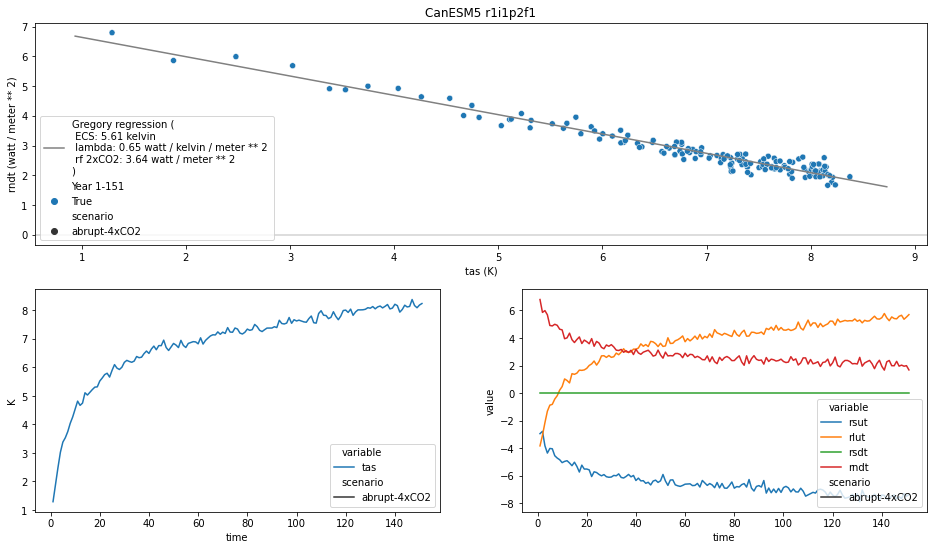

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CMCC/CMCC-CM2-SR5/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20200616/**/NORMED*.MAG
set()
Not all data available for CMCC-CM2-SR5 r1i1p1f1
Missing abrupt-2xCO2


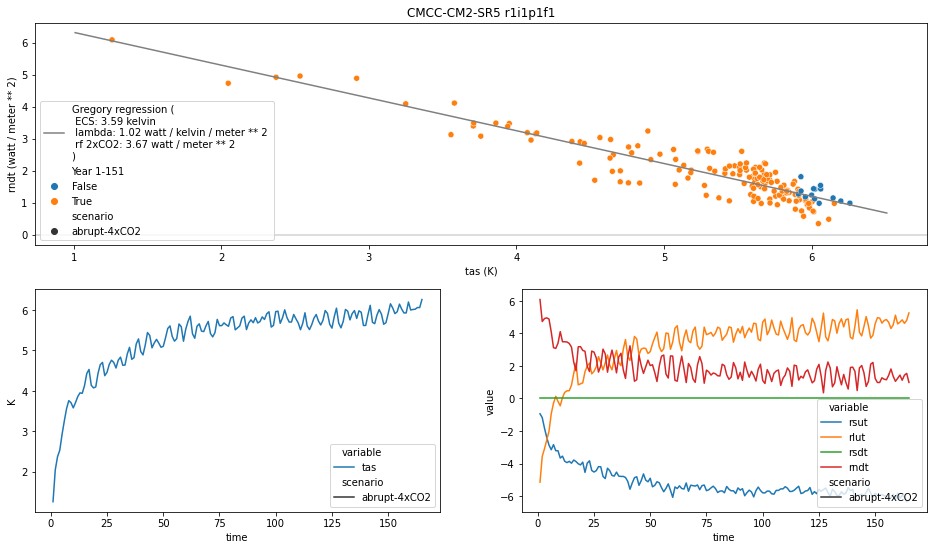

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CNRM-CERFACS/CNRM-CM6-1-HR/abrupt-2xCO2/r1i1p1f2/Amon/tas/gr/v20191021/**/NORMED*.MAG
set()
Not all data available for CNRM-CM6-1-HR r1i1p1f2
Missing abrupt-2xCO2


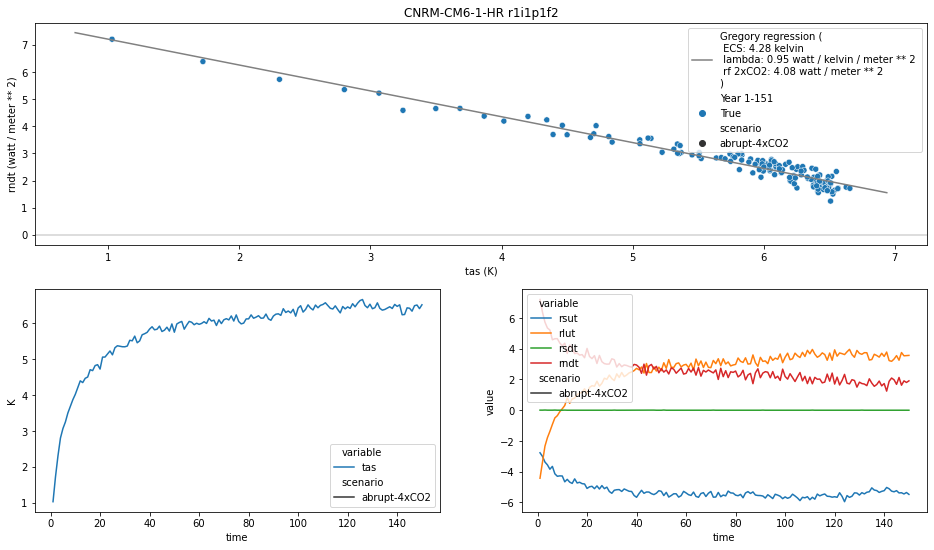

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CNRM-CERFACS/CNRM-CM6-1/abrupt-2xCO2/r1i1p1f2/Amon/tas/gr/v20180705/**/NORMED*.MAG
set()
Not all data available for CNRM-CM6-1 r1i1p1f2
Missing abrupt-2xCO2


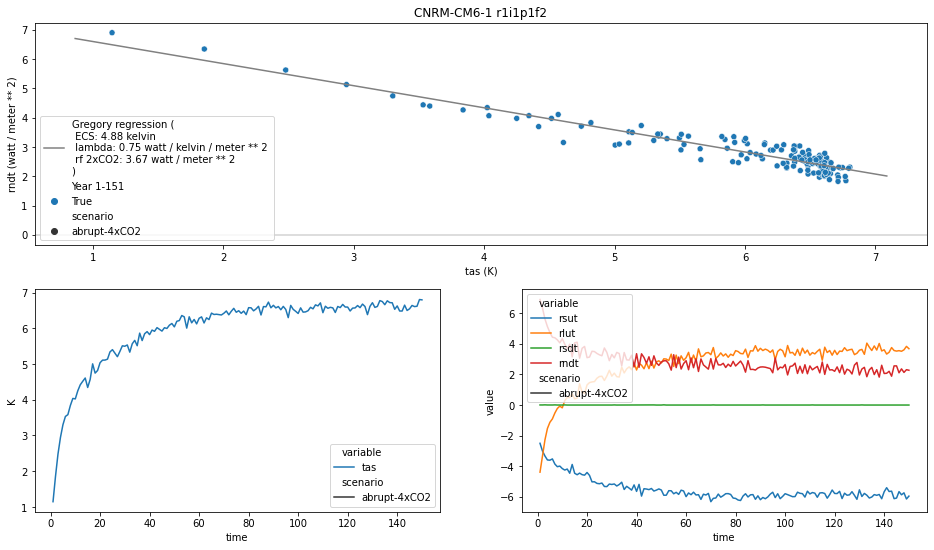

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-2xCO2/r1i1p1f2/Amon/tas/gr/v20181026/**/NORMED*.MAG
set()
Not all data available for CNRM-ESM2-1 r1i1p1f2
Missing abrupt-2xCO2


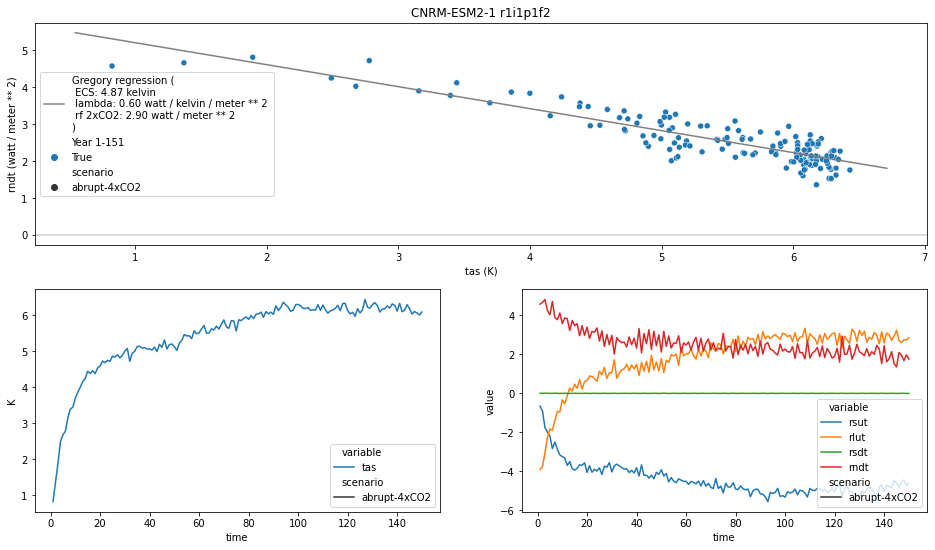

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-2xCO2/r3i1p1f2/Amon/tas/gr/v20190208/**/NORMED*.MAG
set()
Not all data available for CNRM-ESM2-1 r3i1p1f2
Missing abrupt-2xCO2


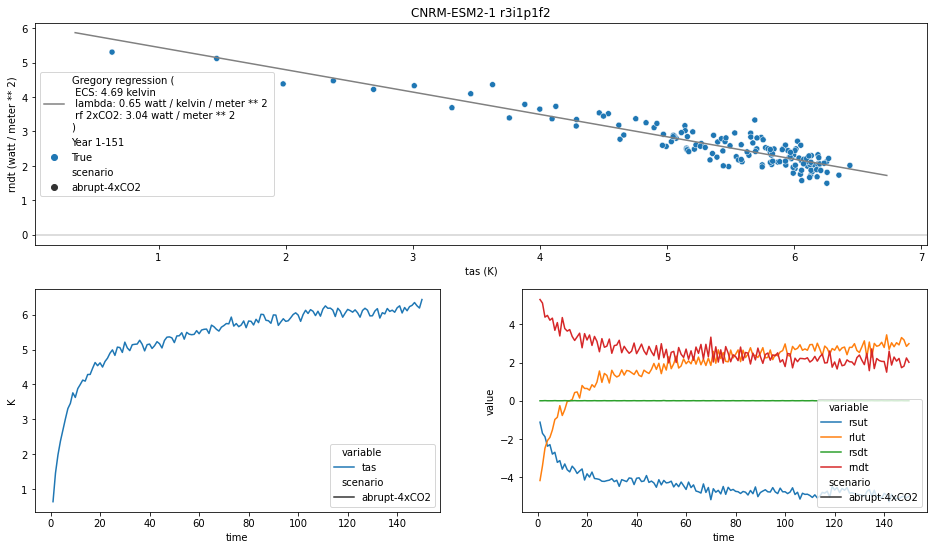

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CSIRO-ARCCSS/ACCESS-CM2/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20191108/**/NORMED*.MAG
set()
Not all data available for ACCESS-CM2 r1i1p1f1
Missing abrupt-2xCO2


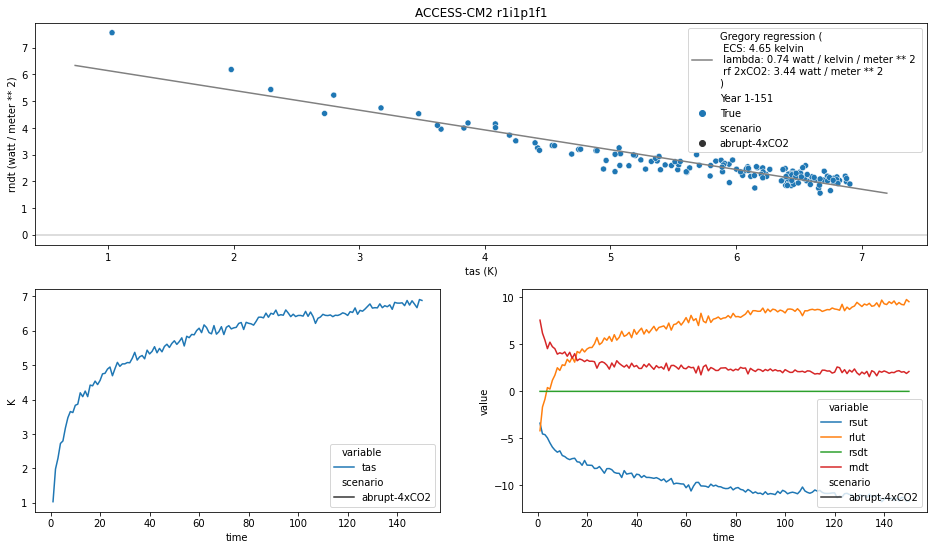

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/CSIRO/ACCESS-ESM1-5/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20191115/**/NORMED*.MAG
set()
Not all data available for ACCESS-ESM1-5 r1i1p1f1
Missing abrupt-2xCO2


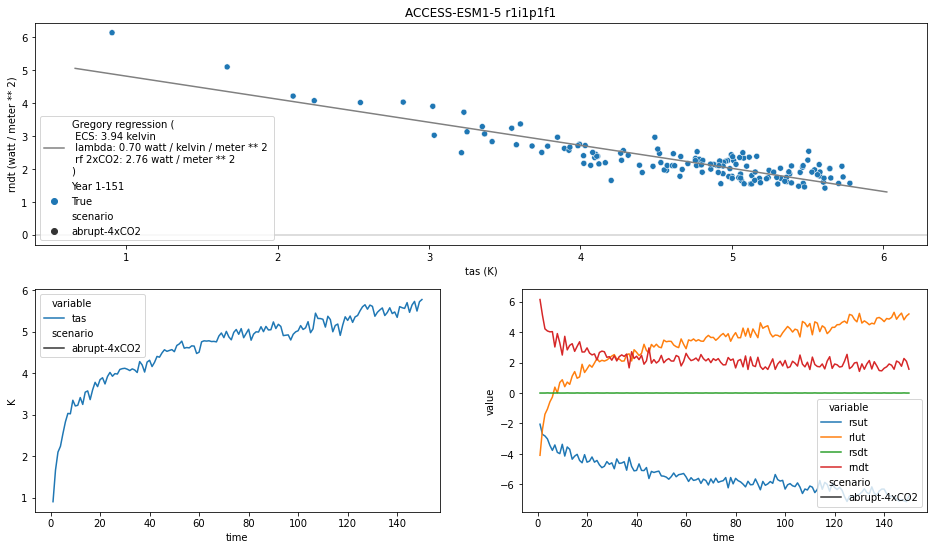

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/E3SM-Project/E3SM-1-0/abrupt-2xCO2/r1i1p1f1/Amon/tas/gr/v20190718/**/NORMED*.MAG
set()
Not all data available for E3SM-1-0 r1i1p1f1
Missing abrupt-2xCO2


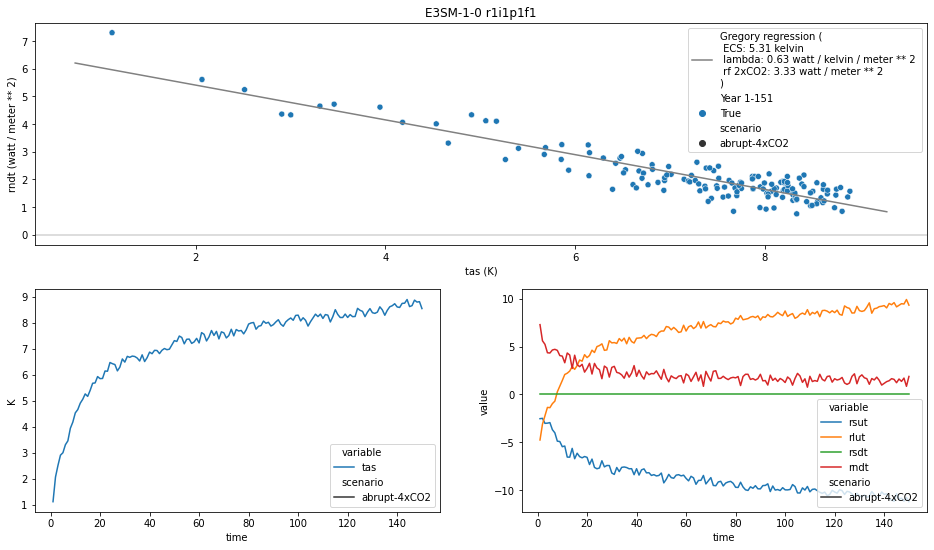

./ecs_data/average-year-mid-year/CMIP6/CMIP/FIO-QLNM/FIO-ESM-2-0/abrupt-4xCO2/r1i1p1f1/Amon/rsut/gn/v20200302/NORMED*.MAG
Not all data available for FIO-ESM-2-0 r1i1p1f1
Missing rsut
Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/FIO-QLNM/FIO-ESM-2-0/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20200302/**/NORMED*.MAG
set()
Not all data available for FIO-ESM-2-0 r1i1p1f1
Missing abrupt-2xCO2
./ecs_data/average-year-mid-year/CMIP6/CMIP/FIO-QLNM/FIO-ESM-2-0/abrupt-4xCO2/r2i1p1f1/Amon/rsut/gn/v20200302/NORMED*.MAG
Not all data available for FIO-ESM-2-0 r2i1p1f1
Missing rsut
Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/FIO-QLNM/FIO-ESM-2-0/abrupt-2xCO2/r2i1p1f1/Amon/tas/gn/v20200302/**/NORMED*.MAG
set()
Not all data available for FIO-ESM-2-0 r2i1p1f1
Missing abrupt-2xCO2
./ecs_data/average-year-mid-year/CMIP6/CMIP/FIO-QLNM/FIO-ESM-2-0/abrupt-4xCO2/r3i1p1f1/Amon/rsut/gn/v20200302/NORMED*.MAG
Not all data available for FIO-ESM-2-0 r3i1p1f1
Missing rs

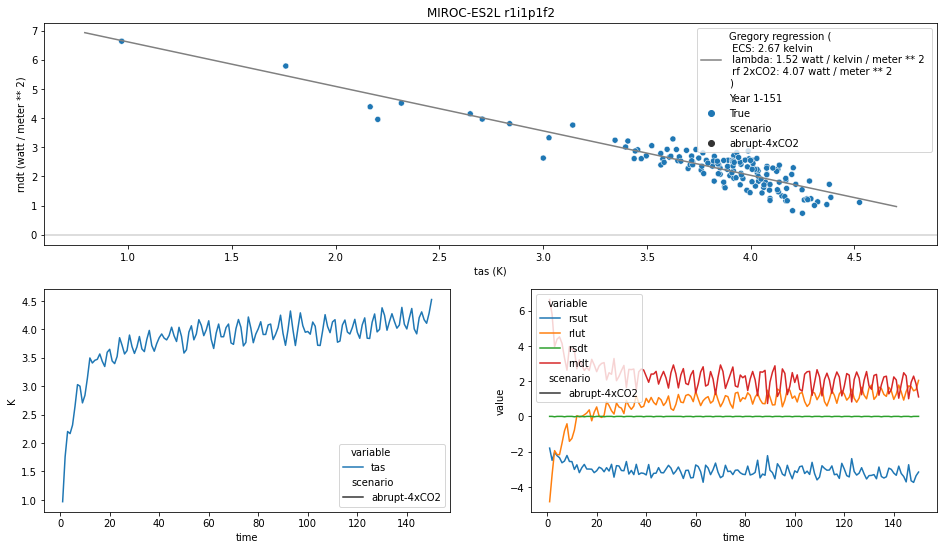

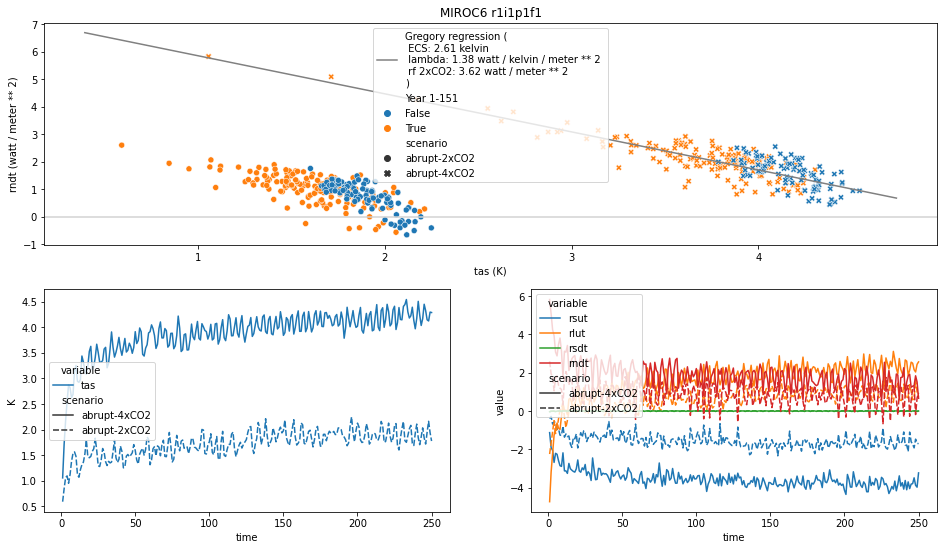

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MOHC/HadGEM3-GC31-LL/abrupt-2xCO2/r1i1p1f3/Amon/tas/gn/v20190620/**/NORMED*.MAG
set()
Not all data available for HadGEM3-GC31-LL r1i1p1f3
Missing abrupt-2xCO2


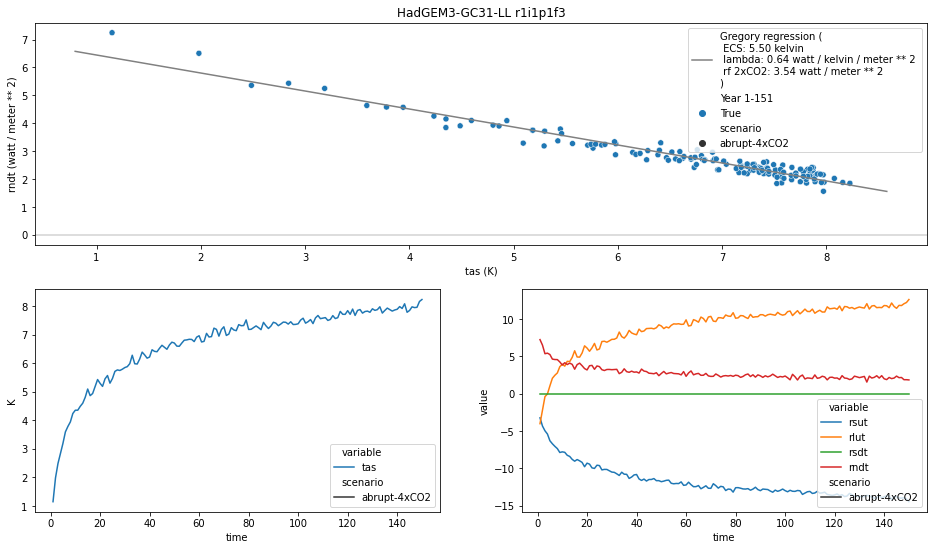

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MOHC/HadGEM3-GC31-MM/abrupt-2xCO2/r1i1p1f3/Amon/tas/gn/v20200115/**/NORMED*.MAG
set()
Not all data available for HadGEM3-GC31-MM r1i1p1f3
Missing abrupt-2xCO2


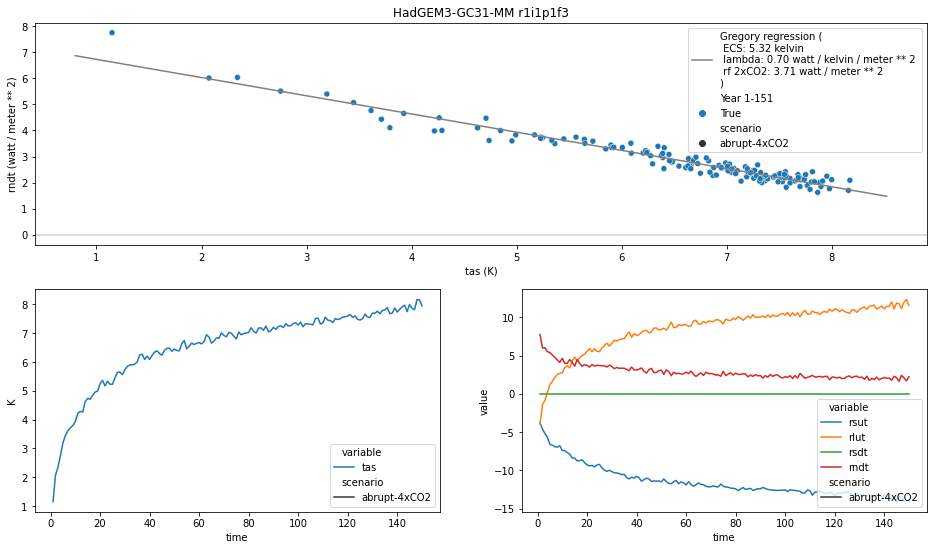

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MPI-M/MPI-ESM1-2-HR/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190710/**/NORMED*.MAG
set()
Not all data available for MPI-ESM1-2-HR r1i1p1f1
Missing abrupt-2xCO2


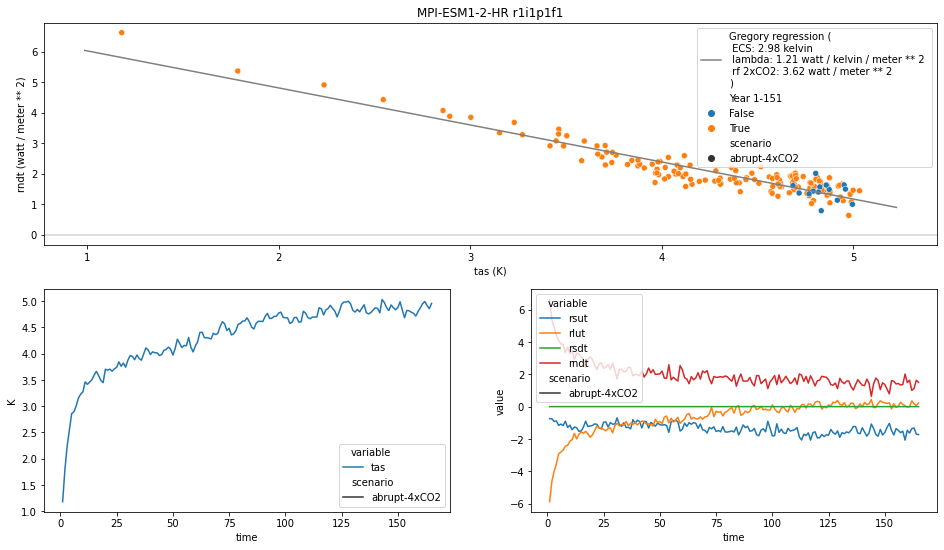

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MPI-M/MPI-ESM1-2-LR/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190710/**/NORMED*.MAG
set()
Not all data available for MPI-ESM1-2-LR r1i1p1f1
Missing abrupt-2xCO2


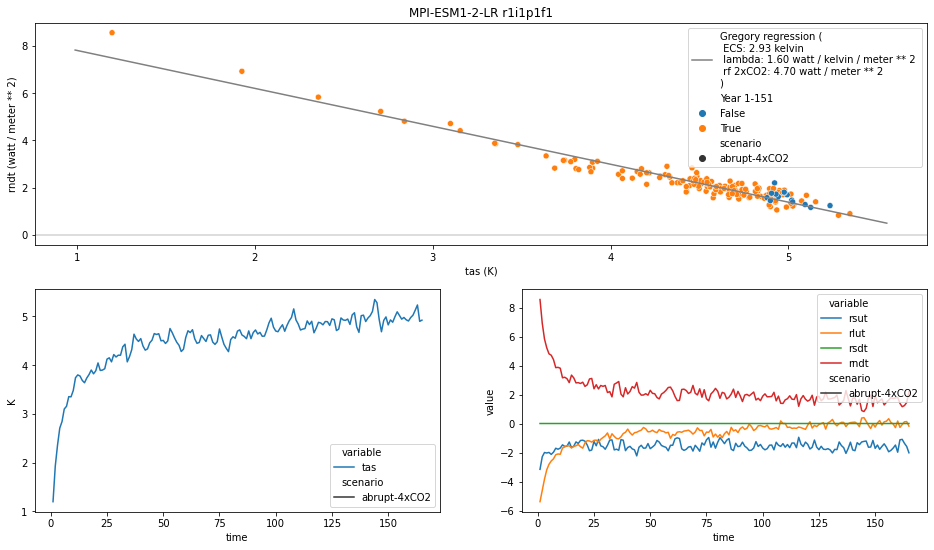

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MRI/MRI-ESM2-0/abrupt-2xCO2/r10i1p1f1/Amon/tas/gn/v20190308/**/NORMED*.MAG
set()
Not all data available for MRI-ESM2-0 r10i1p1f1
Missing abrupt-2xCO2


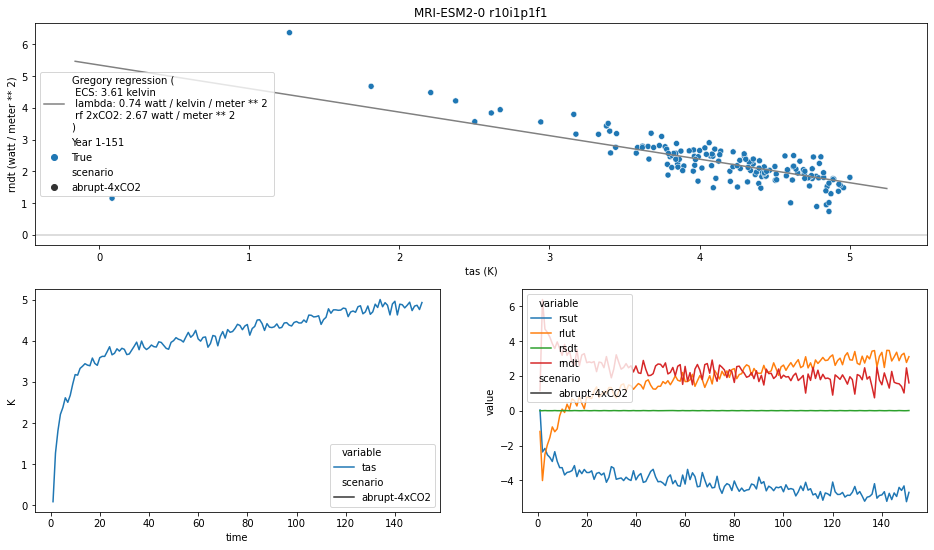

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MRI/MRI-ESM2-0/abrupt-2xCO2/r13i1p1f1/Amon/tas/gn/v20190308/**/NORMED*.MAG
set()
Not all data available for MRI-ESM2-0 r13i1p1f1
Missing abrupt-2xCO2


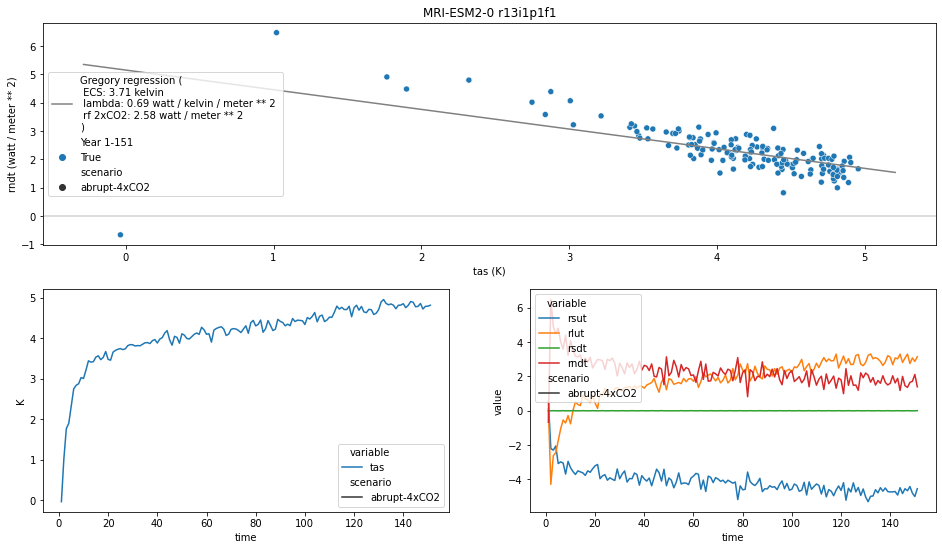

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MRI/MRI-ESM2-0/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190308/**/NORMED*.MAG
set()
Not all data available for MRI-ESM2-0 r1i1p1f1
Missing abrupt-2xCO2


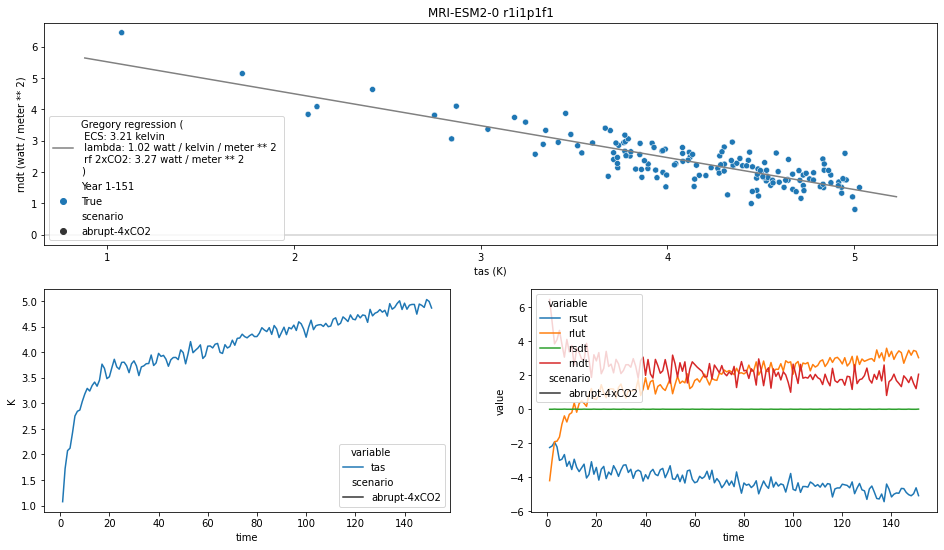

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MRI/MRI-ESM2-0/abrupt-2xCO2/r1i2p1f1/Amon/tas/gn/v20191205/**/NORMED*.MAG
set()
Not all data available for MRI-ESM2-0 r1i2p1f1
Missing abrupt-2xCO2


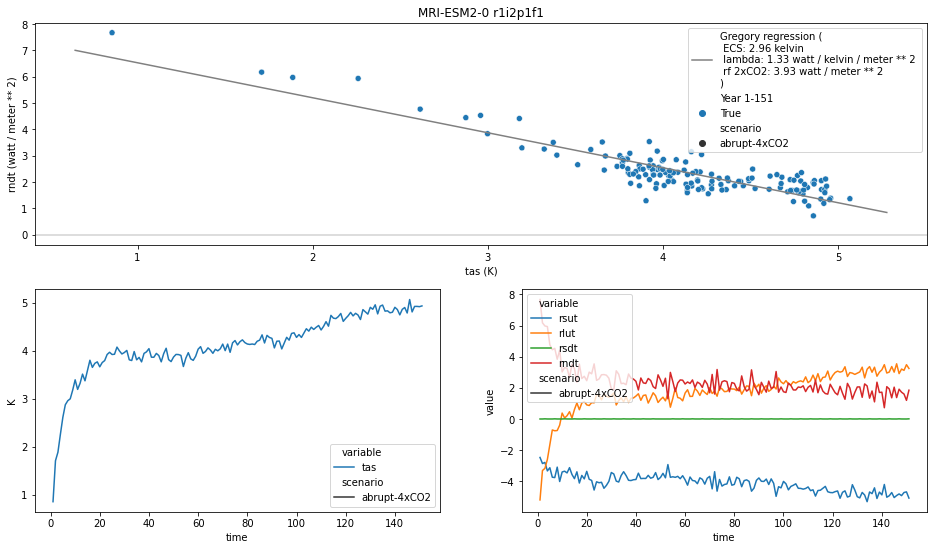

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MRI/MRI-ESM2-0/abrupt-2xCO2/r4i1p1f1/Amon/tas/gn/v20190308/**/NORMED*.MAG
set()
Not all data available for MRI-ESM2-0 r4i1p1f1
Missing abrupt-2xCO2


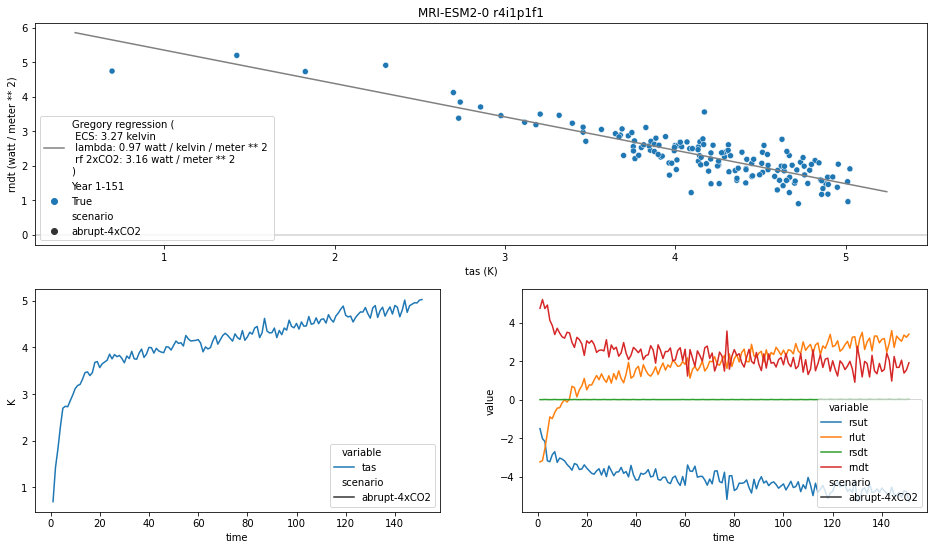

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/MRI/MRI-ESM2-0/abrupt-2xCO2/r7i1p1f1/Amon/tas/gn/v20190308/**/NORMED*.MAG
set()
Not all data available for MRI-ESM2-0 r7i1p1f1
Missing abrupt-2xCO2


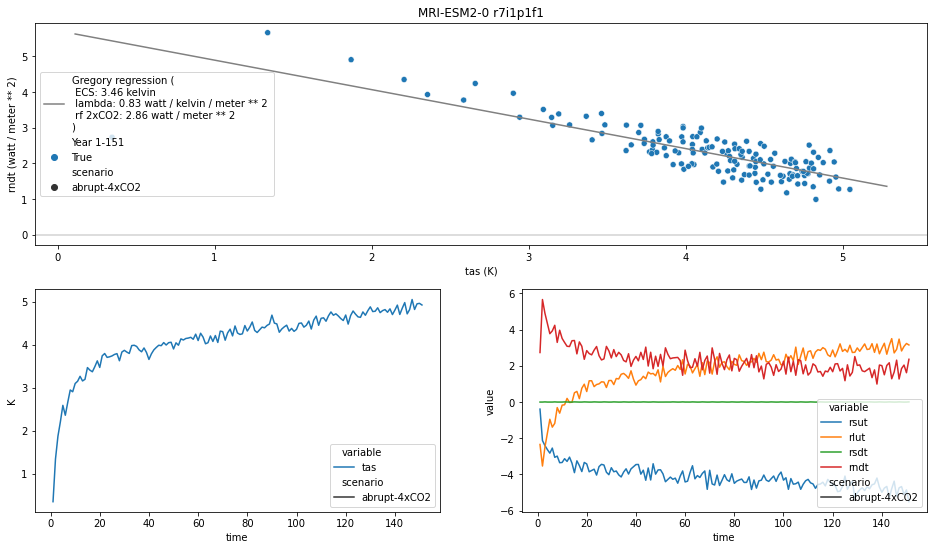

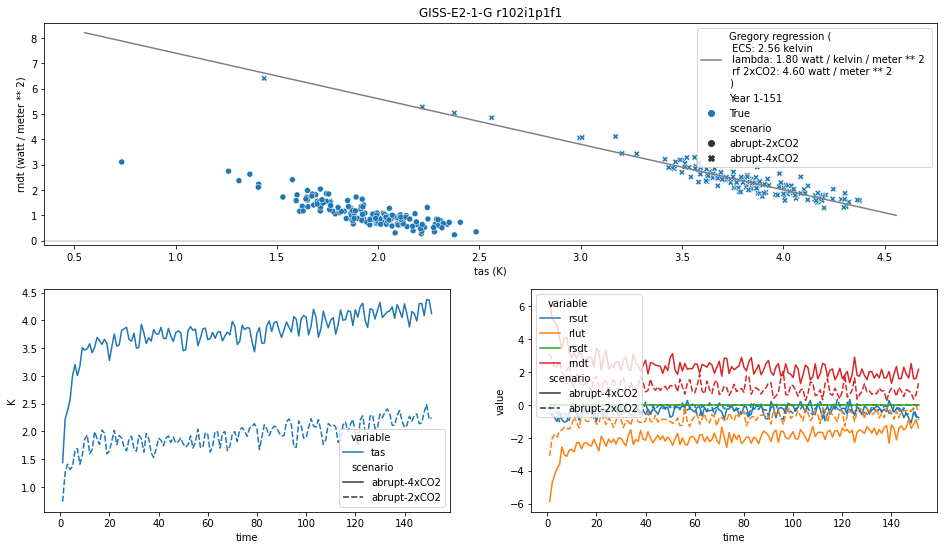

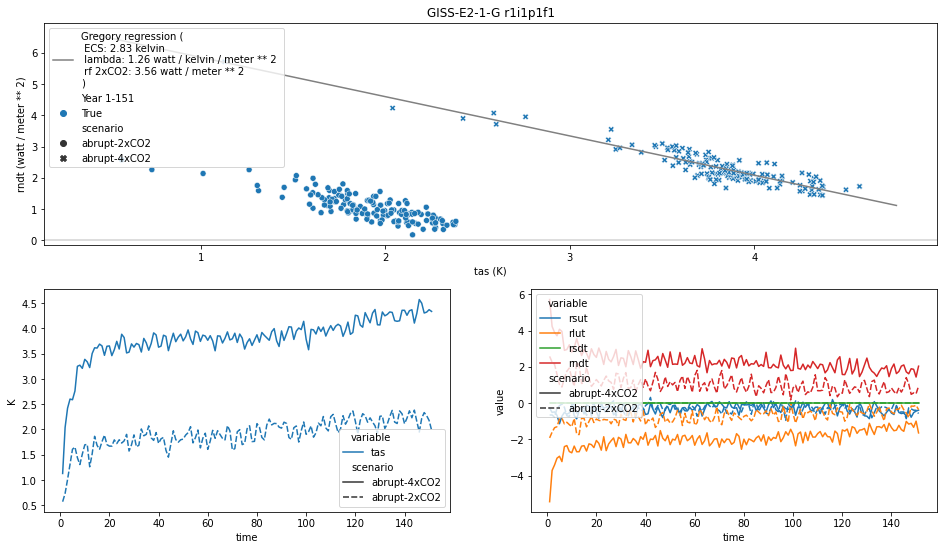

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/NASA-GISS/GISS-E2-1-G/abrupt-2xCO2/r1i1p1f3/Amon/tas/gn/v20190916/**/NORMED*.MAG
set()
Not all data available for GISS-E2-1-G r1i1p1f3
Missing abrupt-2xCO2


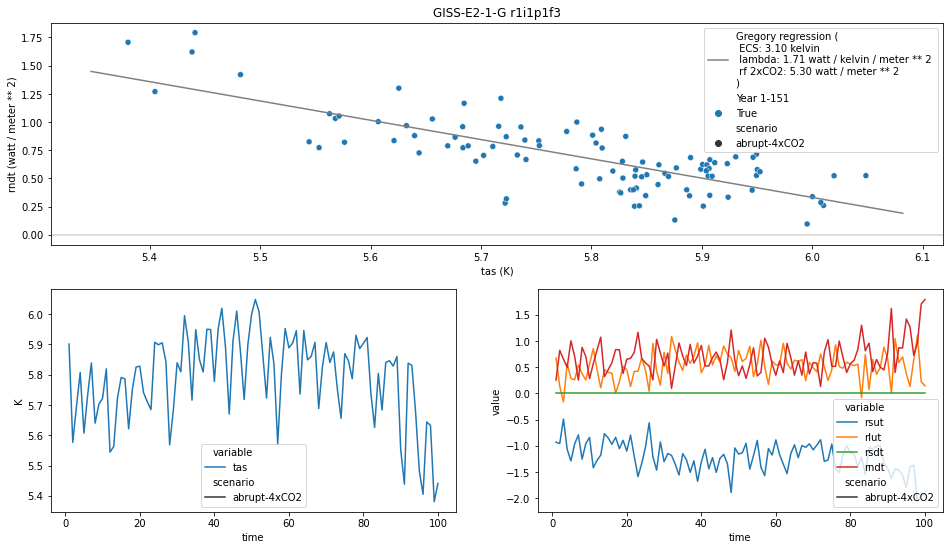

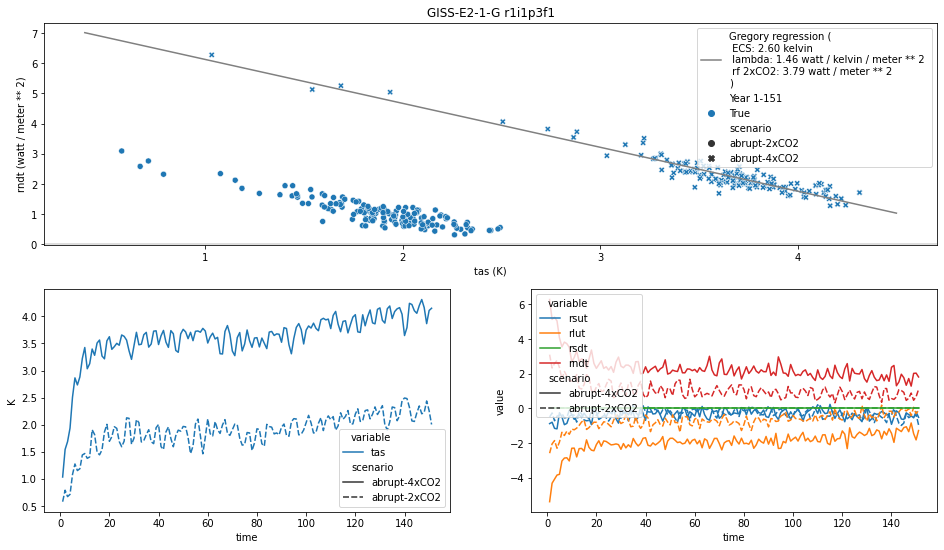

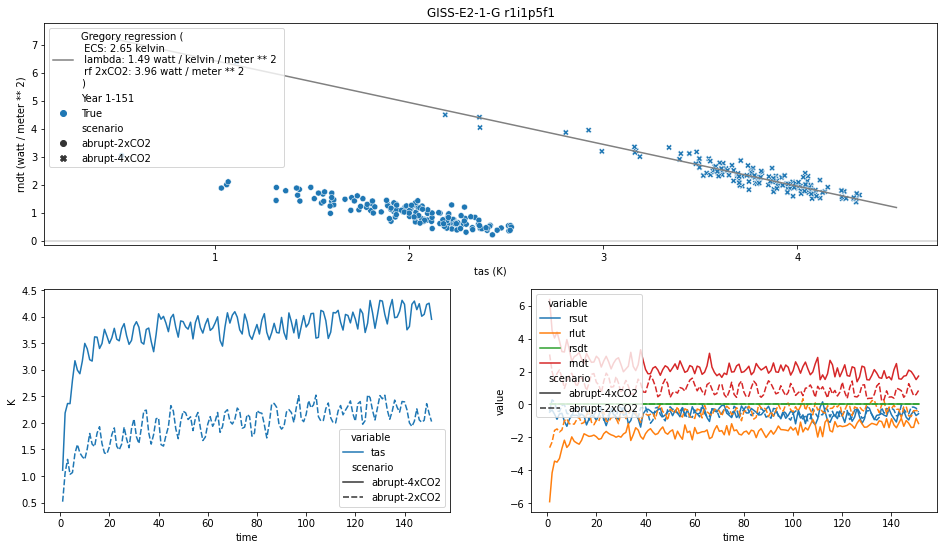

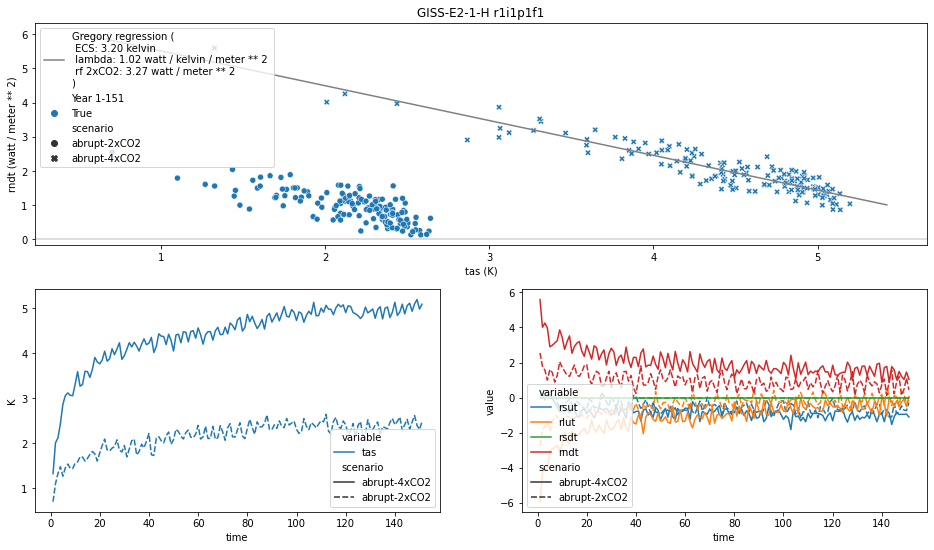

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/NASA-GISS/GISS-E2-1-H/abrupt-2xCO2/r1i1p3f1/Amon/tas/gn/v20191010/**/NORMED*.MAG
set()
Not all data available for GISS-E2-1-H r1i1p3f1
Missing abrupt-2xCO2


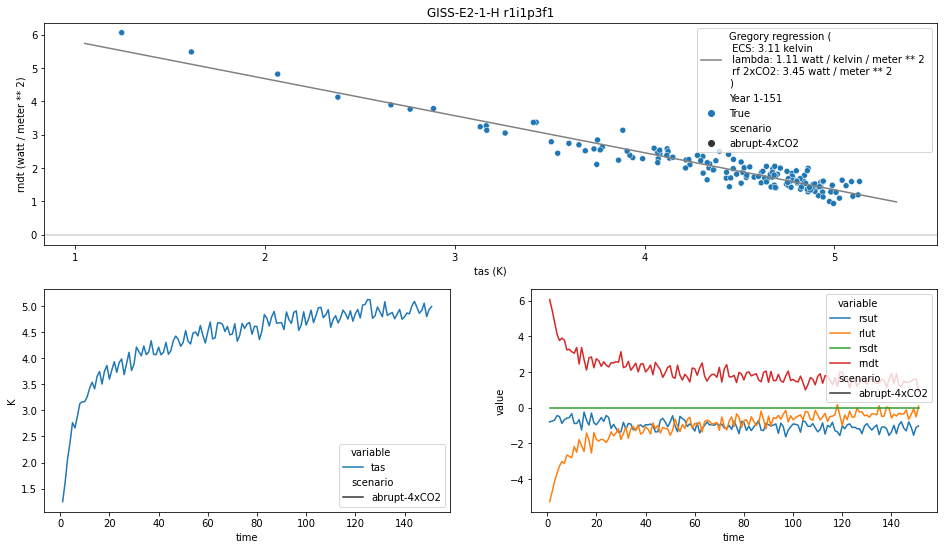

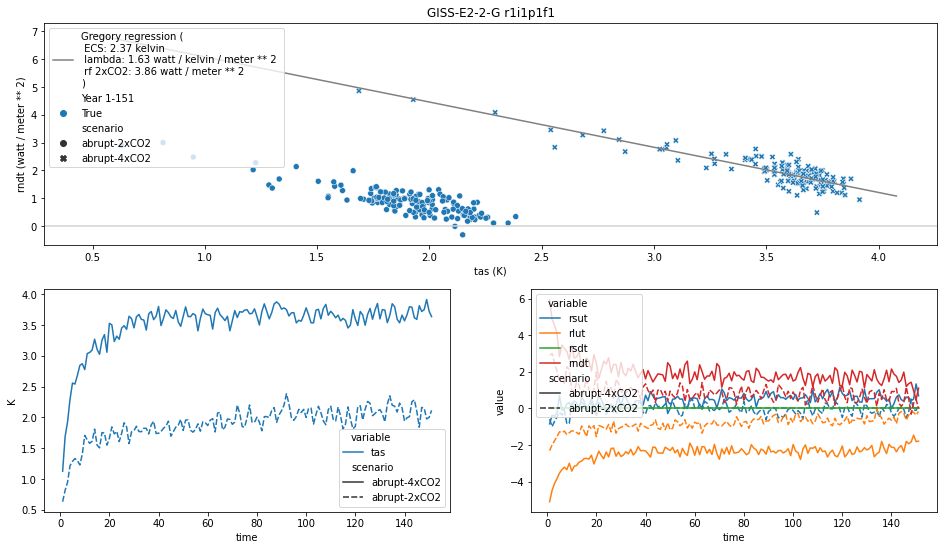

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/NCAR/CESM2-FV2/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20200403/**/NORMED*.MAG
set()
Not all data available for CESM2-FV2 r1i1p1f1
Missing abrupt-2xCO2


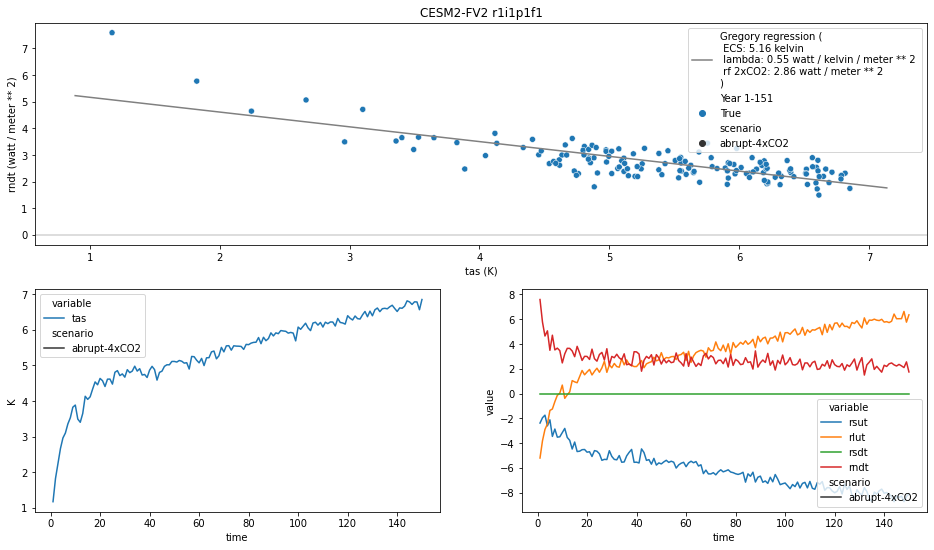

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/NCAR/CESM2-WACCM-FV2/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20200403/**/NORMED*.MAG
set()
Not all data available for CESM2-WACCM-FV2 r1i1p1f1
Missing abrupt-2xCO2


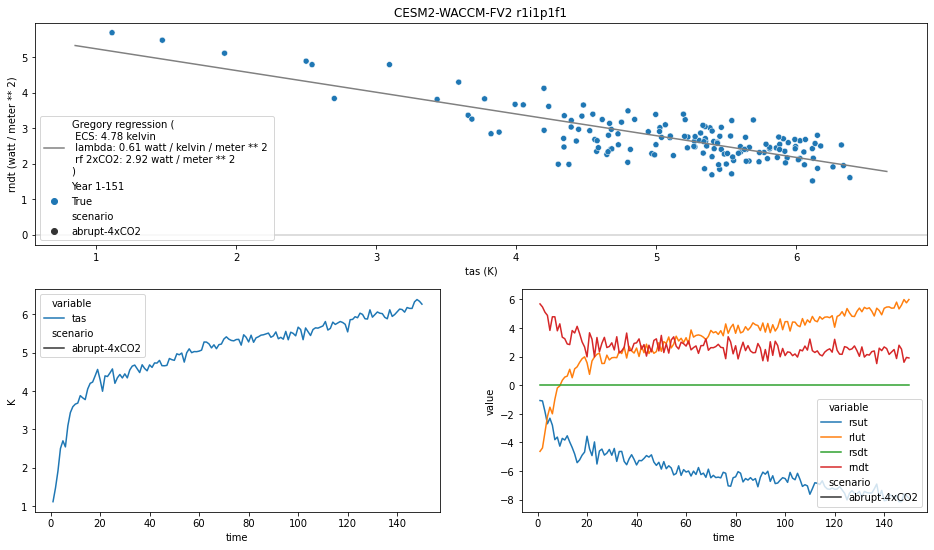

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/NCAR/CESM2-WACCM/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190425/**/NORMED*.MAG
set()
Not all data available for CESM2-WACCM r1i1p1f1
Missing abrupt-2xCO2


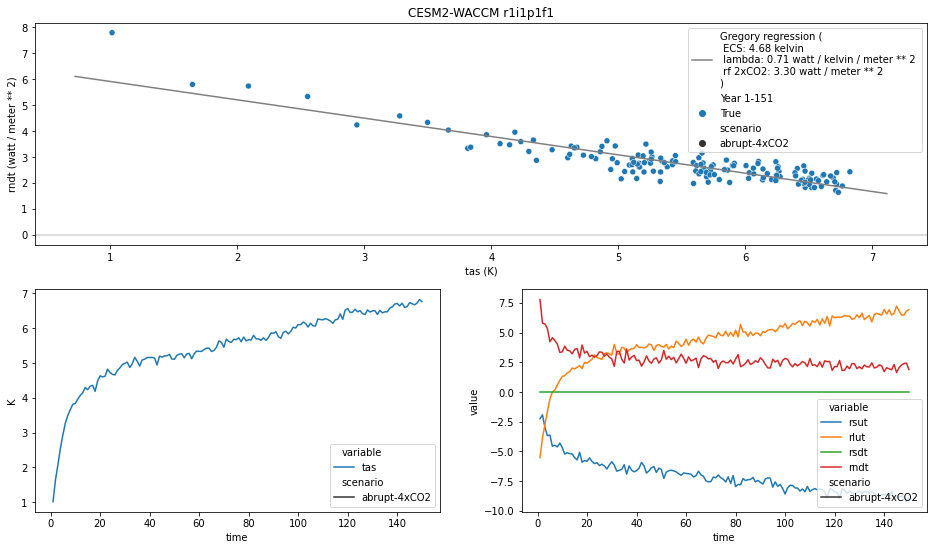

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/NCC/NorCPM1/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190914/**/NORMED*.MAG
set()
Not all data available for NorCPM1 r1i1p1f1
Missing abrupt-2xCO2


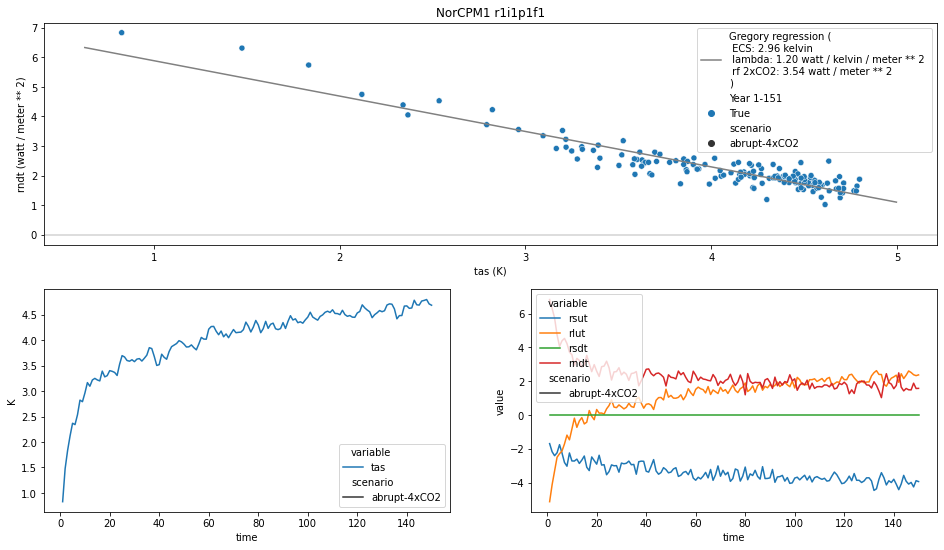

Not all data available for ./ecs_data/average-year-mid-year/CMIP6/CFMIP/SNU/SAM0-UNICON/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190323/**/NORMED*.MAG
set()
Not all data available for SAM0-UNICON r1i1p1f1
Missing abrupt-2xCO2


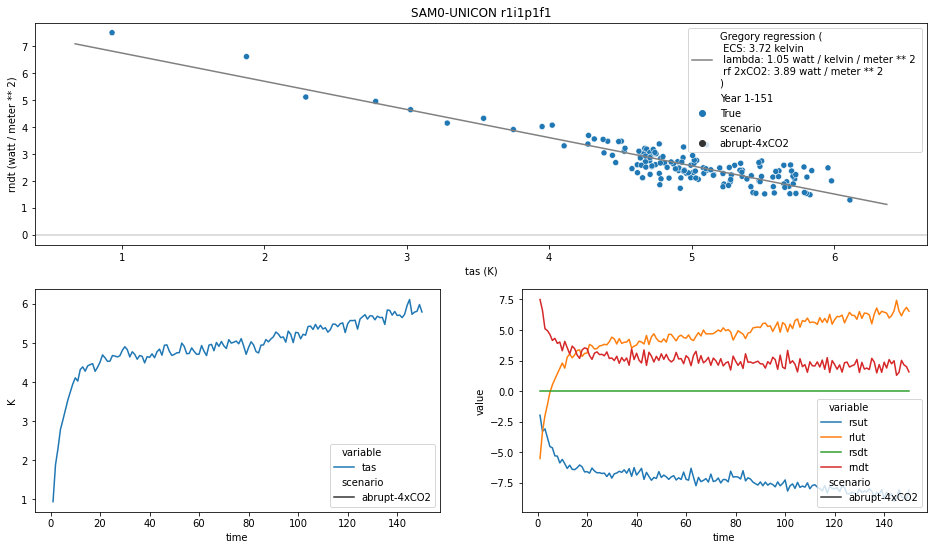

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/ACCESS1-0/r1i1p1/**/NORMED*.MAG
set()
Not all data available for ACCESS1-0 r1i1p1
Missing abrupt-2xCO2


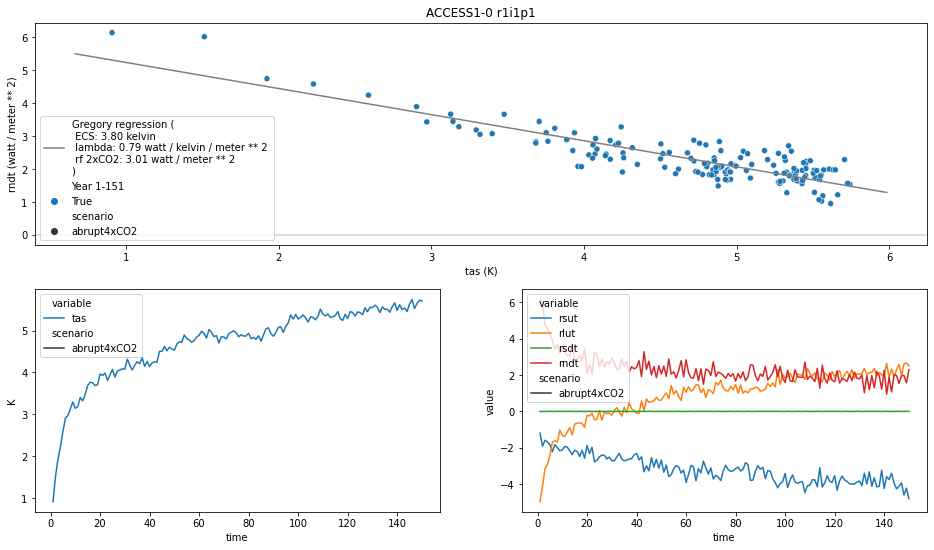

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/ACCESS1-3/r1i1p1/**/NORMED*.MAG
set()
Not all data available for ACCESS1-3 r1i1p1
Missing abrupt-2xCO2


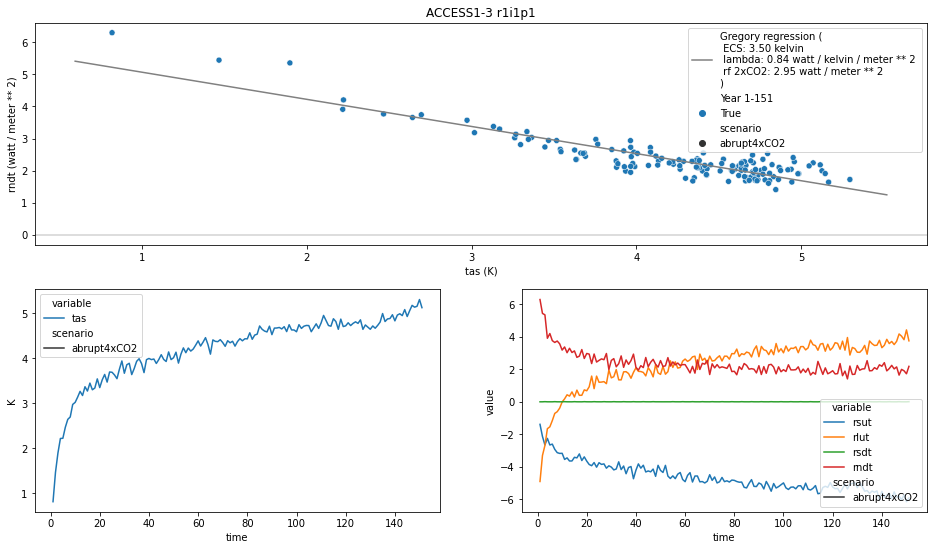

./ecs_data/average-year-mid-year/cmip5/abrupt4xCO2/Amon/rsdt/BNU-ESM/r1i1p1/NORMED*.MAG
Not all data available for BNU-ESM r1i1p1
Missing rsdt
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/BNU-ESM/r1i1p1/**/NORMED*.MAG
set()
Not all data available for BNU-ESM r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CNRM-CM5/r1i1p1/**/NORMED*.MAG
set()
Not all data available for CNRM-CM5 r1i1p1
Missing abrupt-2xCO2


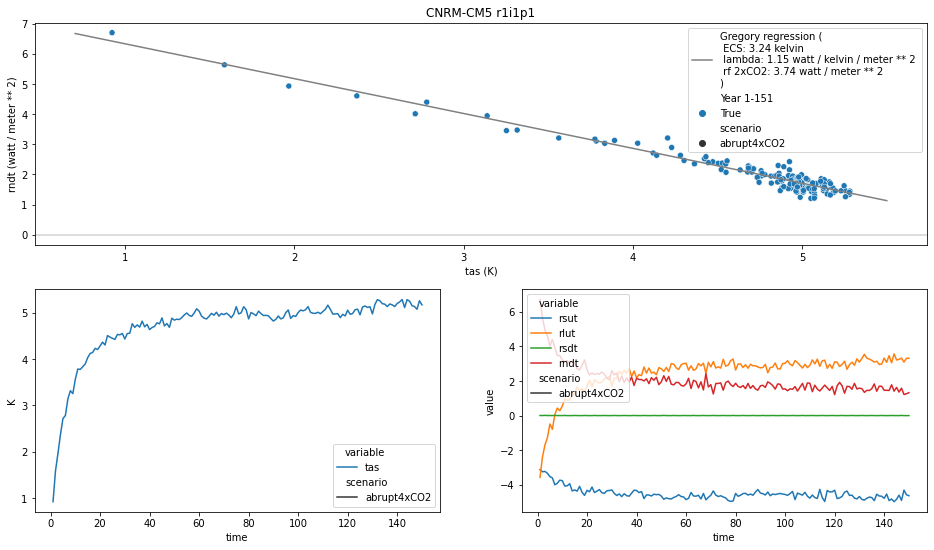

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CSIRO-Mk3-6-0/r1i1p1/**/NORMED*.MAG
set()
Not all data available for CSIRO-Mk3-6-0 r1i1p1
Missing abrupt-2xCO2


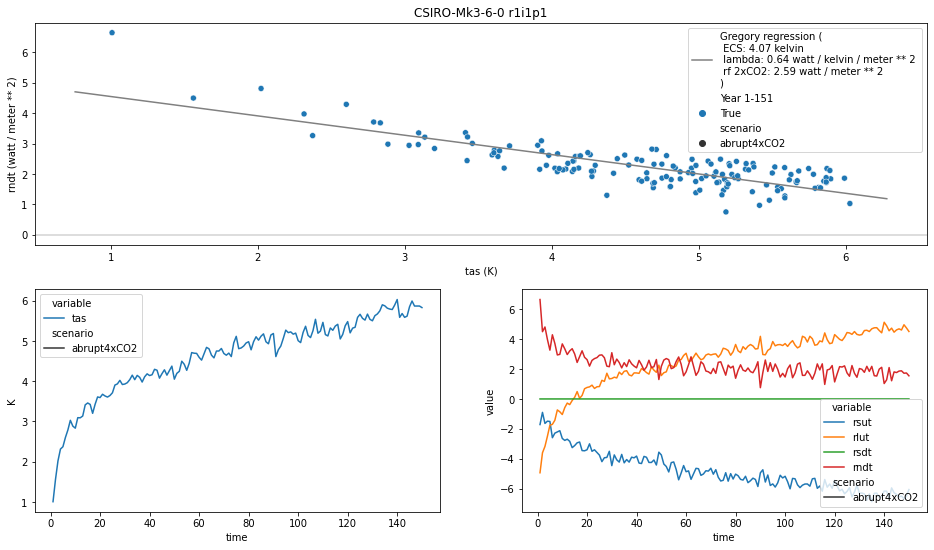

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r10i1p1/**/NORMED*.MAG
set()
Not all data available for CSIRO-Mk3-6-0 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r11i1p1/**/NORMED*.MAG
set()
Not all data available for CSIRO-Mk3-6-0 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r12i1p1/**/NORMED*.MAG
set()
Not all data available for CSIRO-Mk3-6-0 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r1i1p1/**/NORMED*.MAG
set()
Not all data available for CanESM2 r1i1p1
Missing abrupt-2xCO2


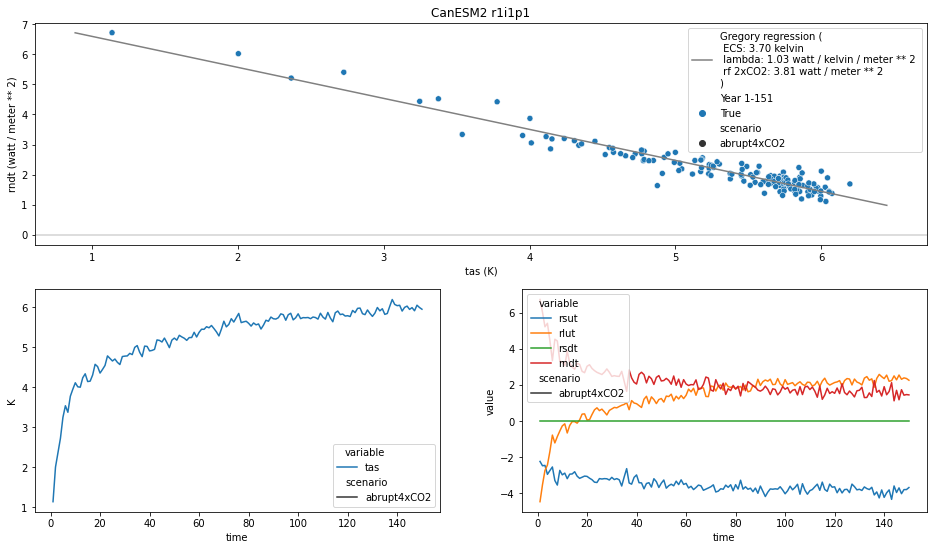

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r2i1p1/**/NORMED*.MAG
set()
Not all data available for CanESM2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r3i1p1/**/NORMED*.MAG
set()
Not all data available for CanESM2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r4i1p1/**/NORMED*.MAG
set()
Not all data available for CanESM2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r5i1p1/**/NORMED*.MAG
set()
Not all data available for CanESM2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/CanESM2/r6i1p1/**/NORMED*.MAG
set()
Not all data available for CanESM2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5

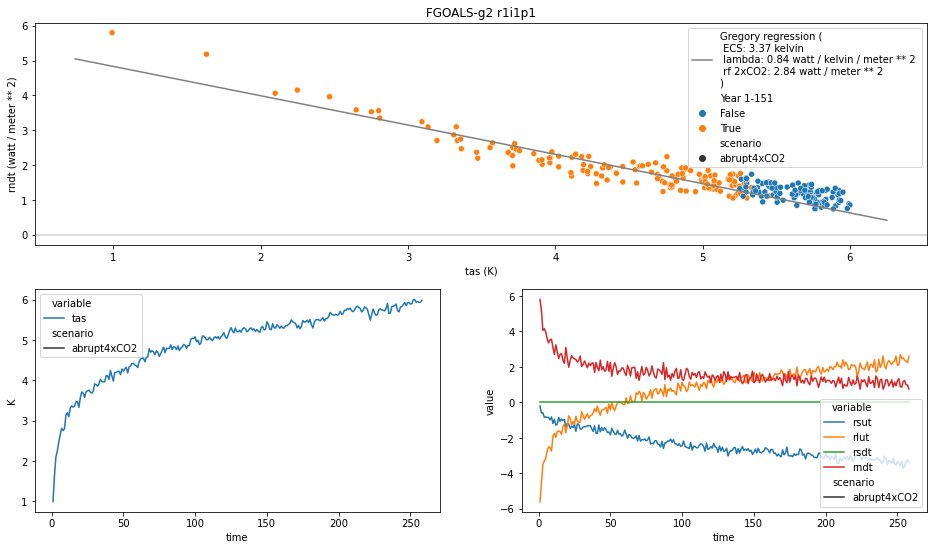

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/FGOALS-g2/r2i1p1/**/NORMED*.MAG
set()
Not all data available for FGOALS-g2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/FGOALS-g2/r3i1p1/**/NORMED*.MAG
set()
Not all data available for FGOALS-g2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/FGOALS-g2/r4i1p1/**/NORMED*.MAG
set()
Not all data available for FGOALS-g2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/FGOALS-g2/r5i1p1/**/NORMED*.MAG
set()
Not all data available for FGOALS-g2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/FGOALS-g2/r6i1p1/**/NORMED*.MAG
set()
Not all data available for FGOALS-g2 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average

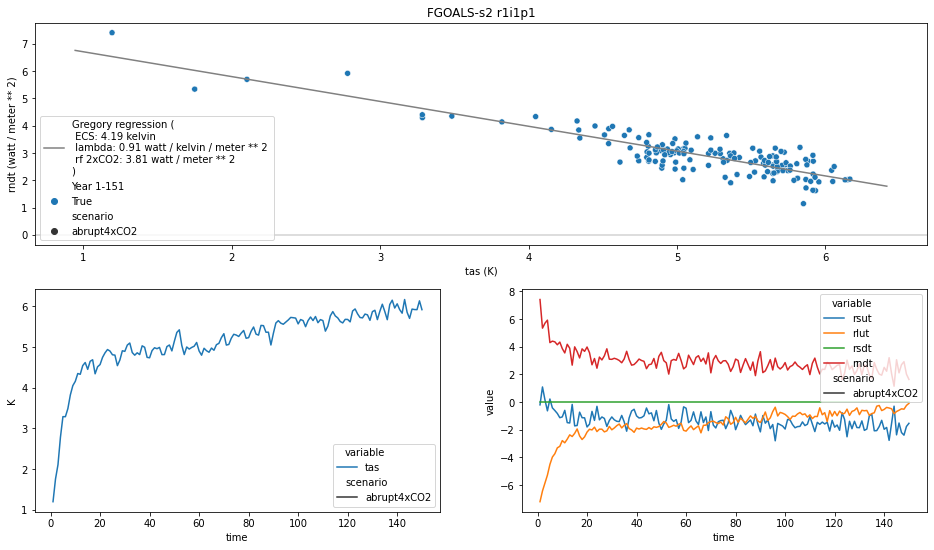

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/GISS-E2-H/r1i1p2/**/NORMED*.MAG
set()
Not all data available for GISS-E2-H r1i1p2
Missing abrupt-2xCO2


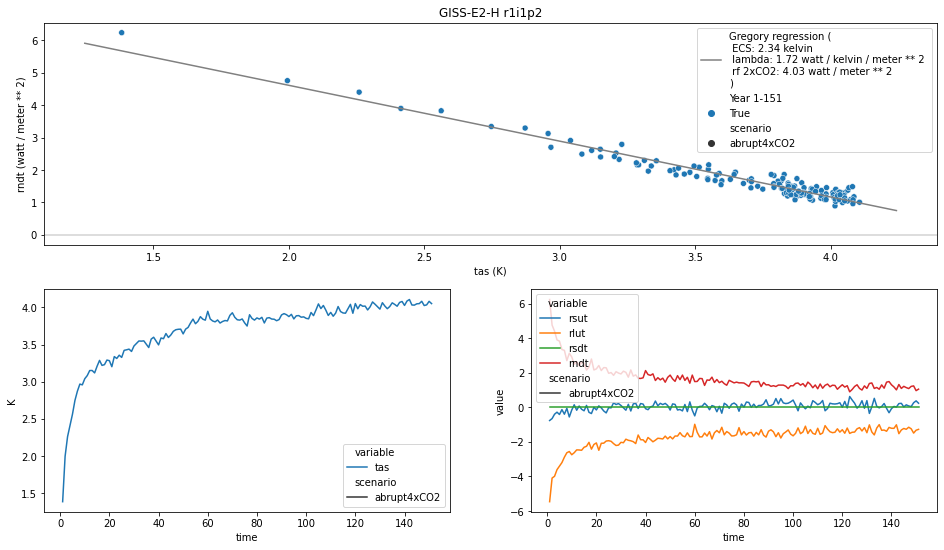

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/GISS-E2-H/r1i1p3/**/NORMED*.MAG
set()
Not all data available for GISS-E2-H r1i1p3
Missing abrupt-2xCO2


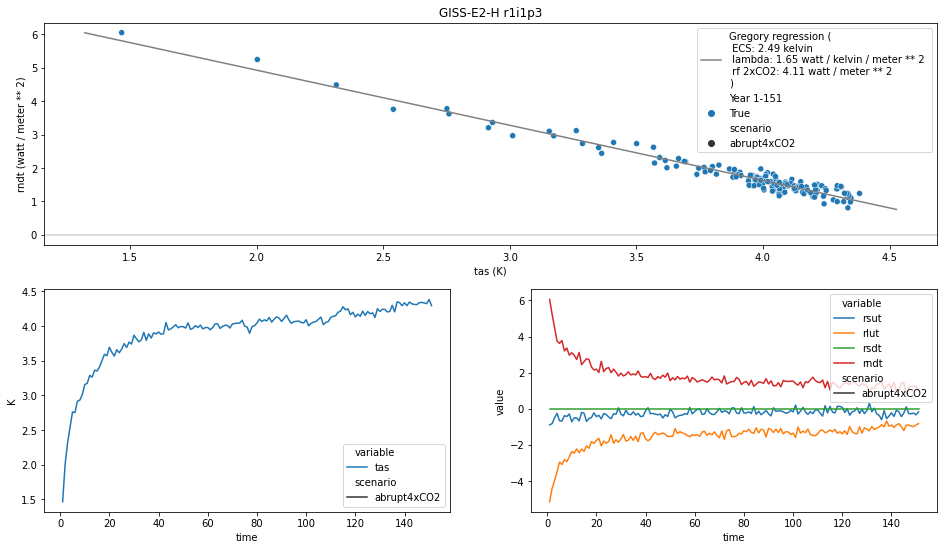

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/GISS-E2-R/r1i1p2/**/NORMED*.MAG
set()
Not all data available for GISS-E2-R r1i1p2
Missing abrupt-2xCO2


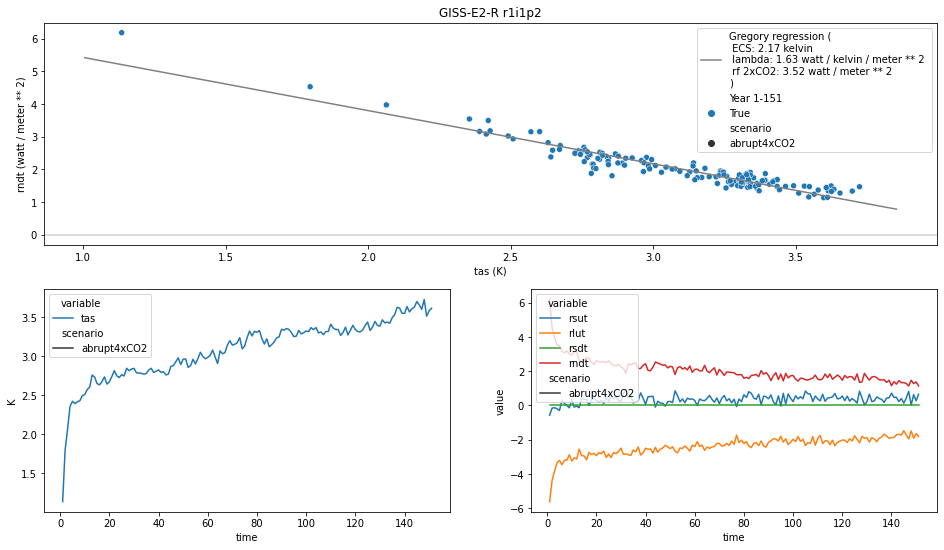

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/GISS-E2-R/r1i1p3/**/NORMED*.MAG
set()
Not all data available for GISS-E2-R r1i1p3
Missing abrupt-2xCO2


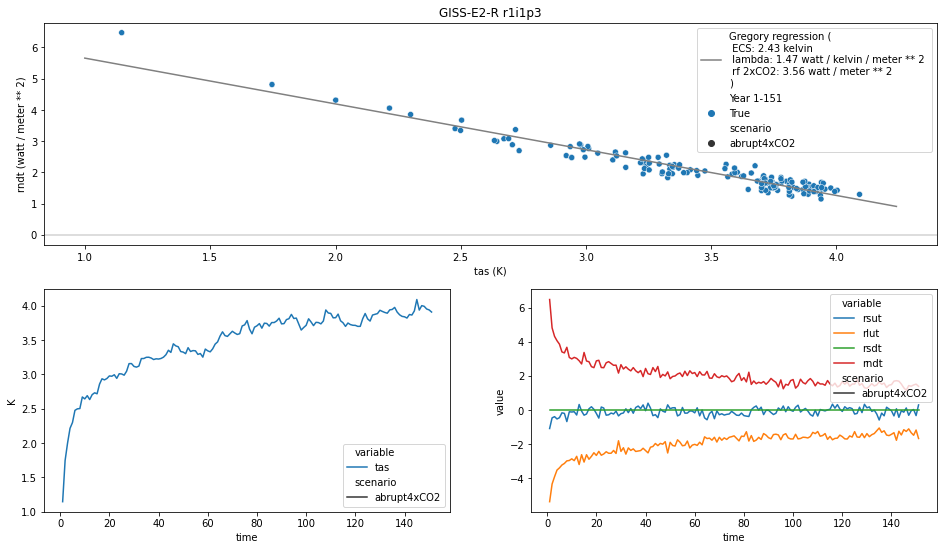

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r10i1p1/**/NORMED*.MAG
set()
Not all data available for GISS-E2-R r1i1p3
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r11i1p1/**/NORMED*.MAG
set()
Not all data available for GISS-E2-R r1i1p3
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r12i1p1/**/NORMED*.MAG
set()
Not all data available for GISS-E2-R r1i1p3
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r1i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5A-LR r1i1p1
Missing abrupt-2xCO2


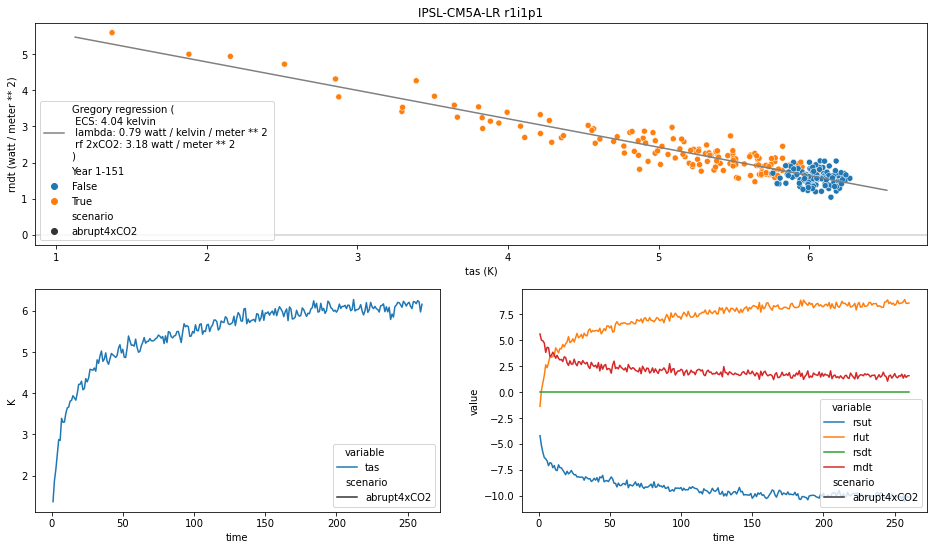

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r2i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5A-LR r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r3i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5A-LR r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r4i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5A-LR r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r5i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5A-LR r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5A-LR/r6i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5A-LR r1i1p1
Missing abrupt-2xCO2
Not all data av

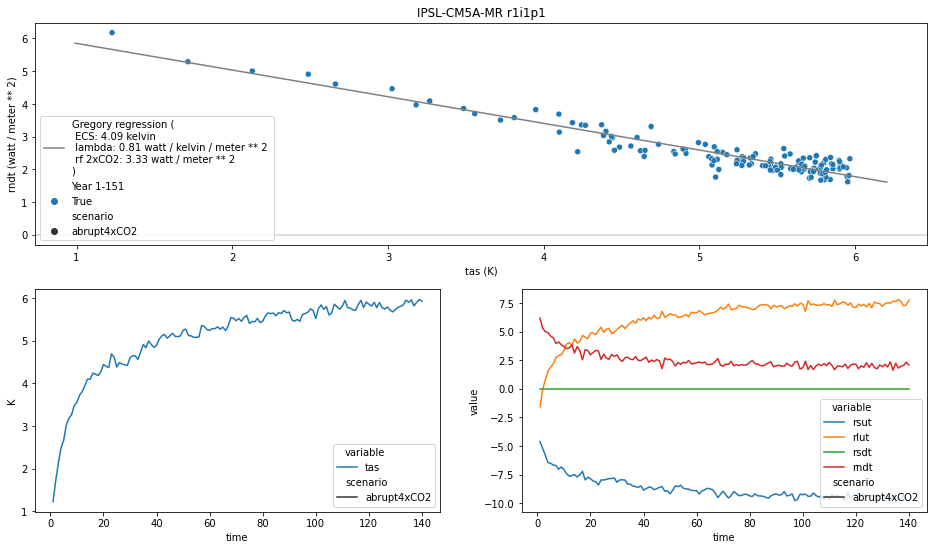

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/IPSL-CM5B-LR/r1i1p1/**/NORMED*.MAG
set()
Not all data available for IPSL-CM5B-LR r1i1p1
Missing abrupt-2xCO2


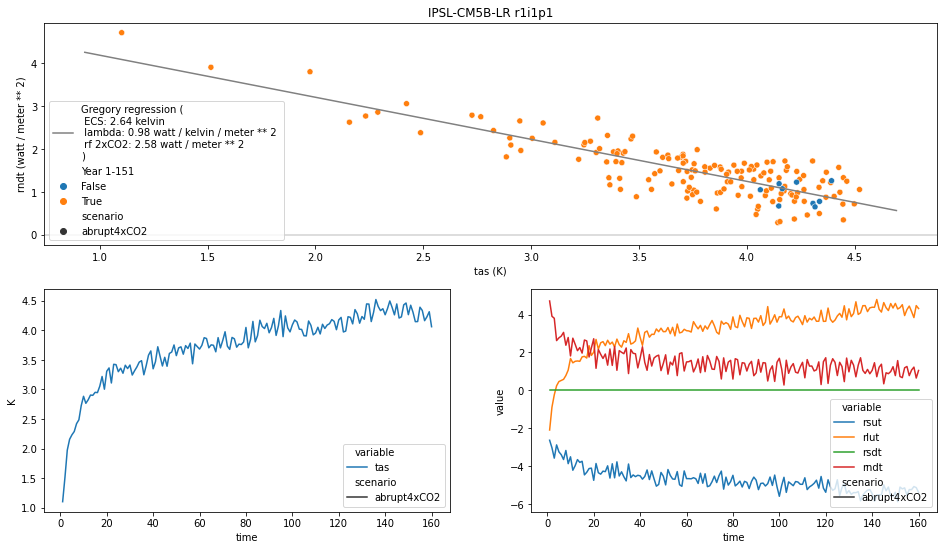

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC-ESM/r1i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC-ESM r1i1p1
Missing abrupt-2xCO2


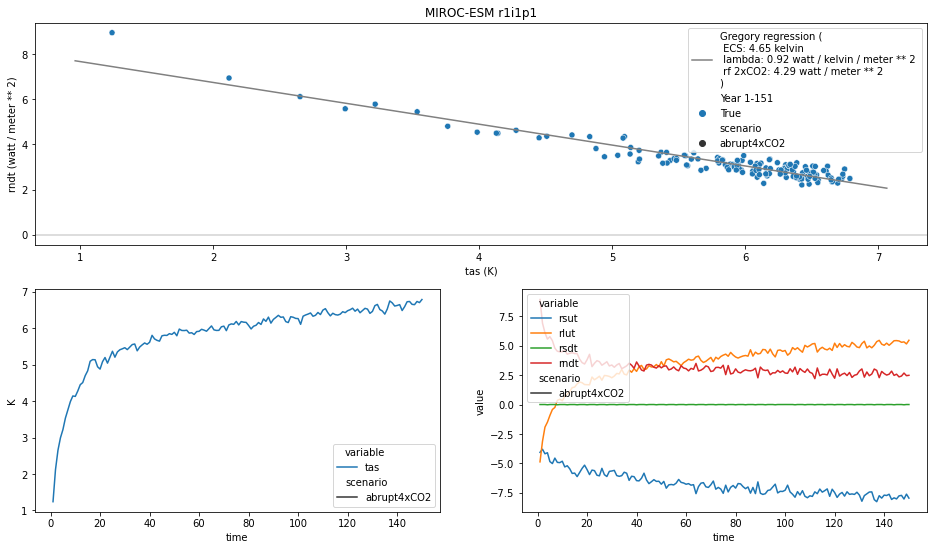

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r10i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC-ESM r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r11i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC-ESM r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r12i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC-ESM r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r1i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC5 r1i1p1
Missing abrupt-2xCO2


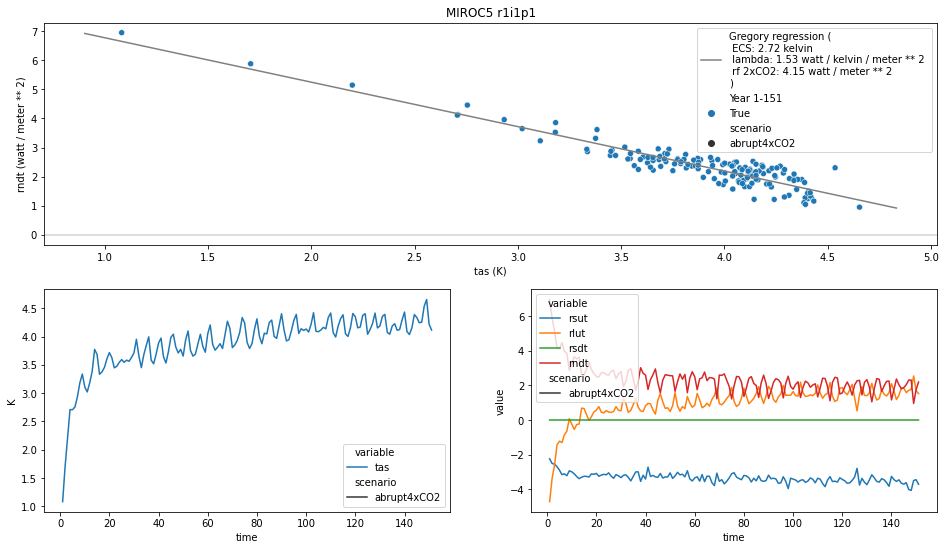

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r2i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC5 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r3i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC5 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r4i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC5 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r5i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC5 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MIROC5/r6i1p1/**/NORMED*.MAG
set()
Not all data available for MIROC5 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2x

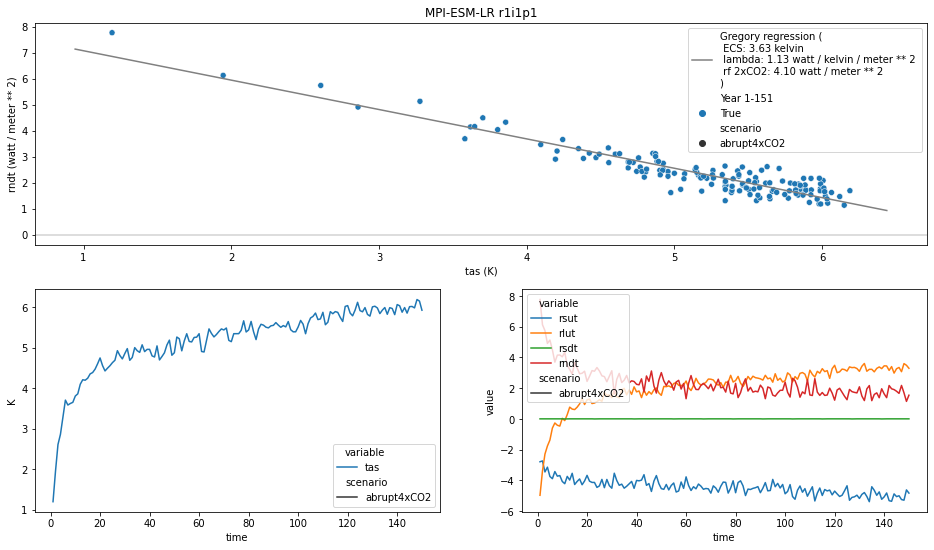

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MPI-ESM-MR/r1i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-MR r1i1p1
Missing abrupt-2xCO2


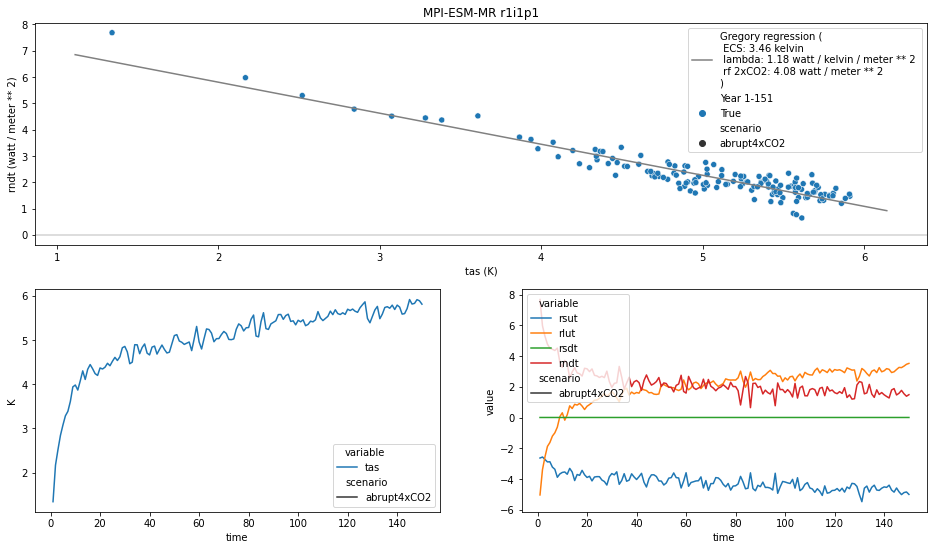

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MPI-ESM-P/r1i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-P r1i1p1
Missing abrupt-2xCO2


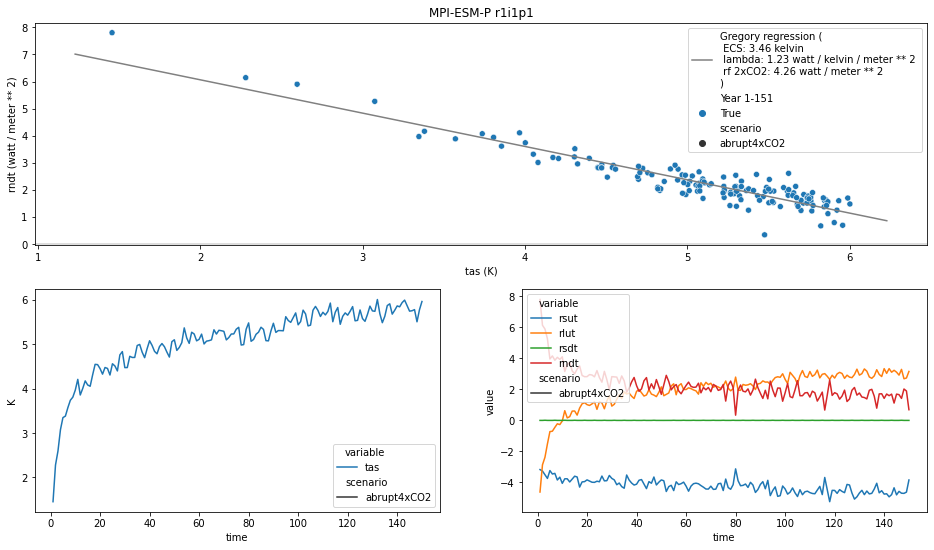

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r10i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-P r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r11i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-P r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r12i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-P r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r13i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-P r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r14i1p1/**/NORMED*.MAG
set()
Not all data available for MPI-ESM-P r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/av

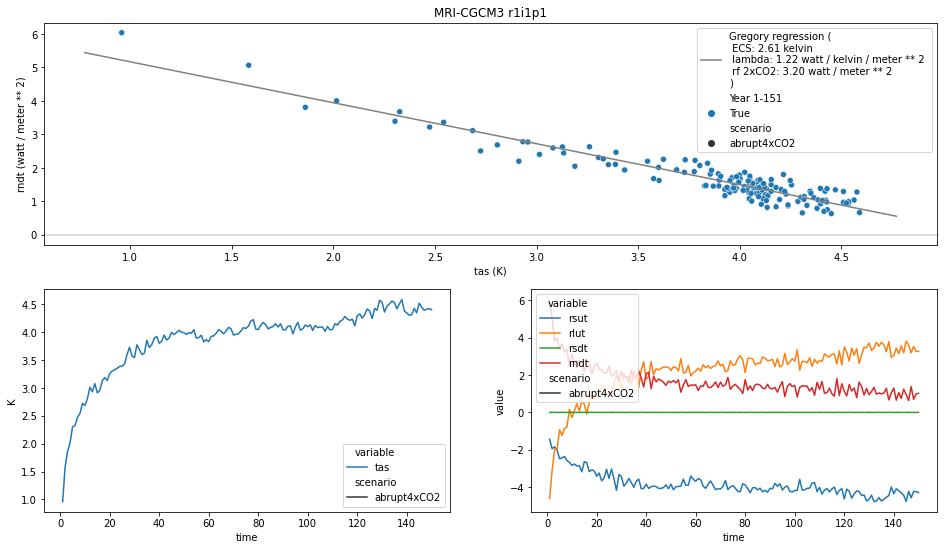

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r20i1p1/**/NORMED*.MAG
set()
Not all data available for MRI-CGCM3 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r21i1p1/**/NORMED*.MAG
set()
Not all data available for MRI-CGCM3 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r22i1p1/**/NORMED*.MAG
set()
Not all data available for MRI-CGCM3 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r23i1p1/**/NORMED*.MAG
set()
Not all data available for MRI-CGCM3 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/MRI-CGCM3/r2i1p1/**/NORMED*.MAG
set()
Not all data available for MRI-CGCM3 r1i1p1
Missing abrupt-2xCO2
Not all data available for ./ecs_data/ave

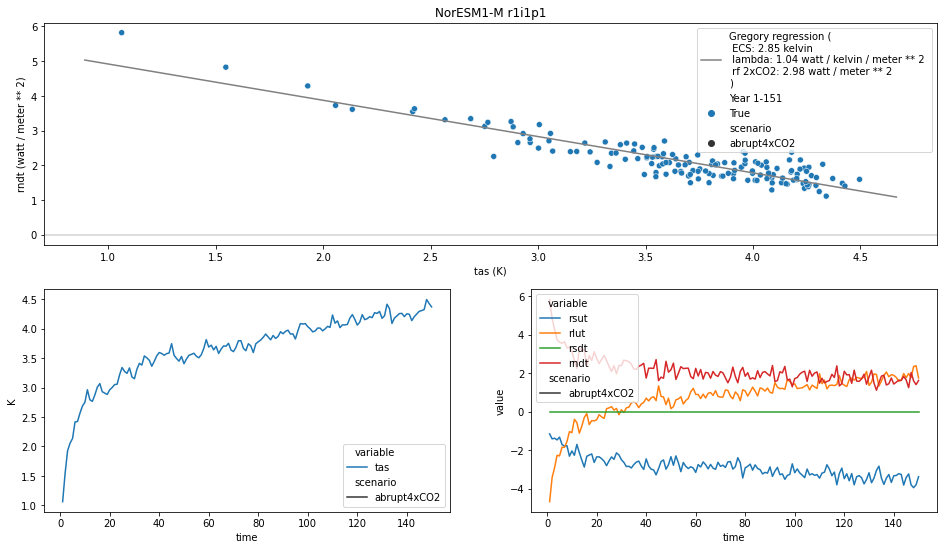

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/bcc-csm1-1-m/r1i1p1/**/NORMED*.MAG
set()
Not all data available for bcc-csm1-1-m r1i1p1
Missing abrupt-2xCO2


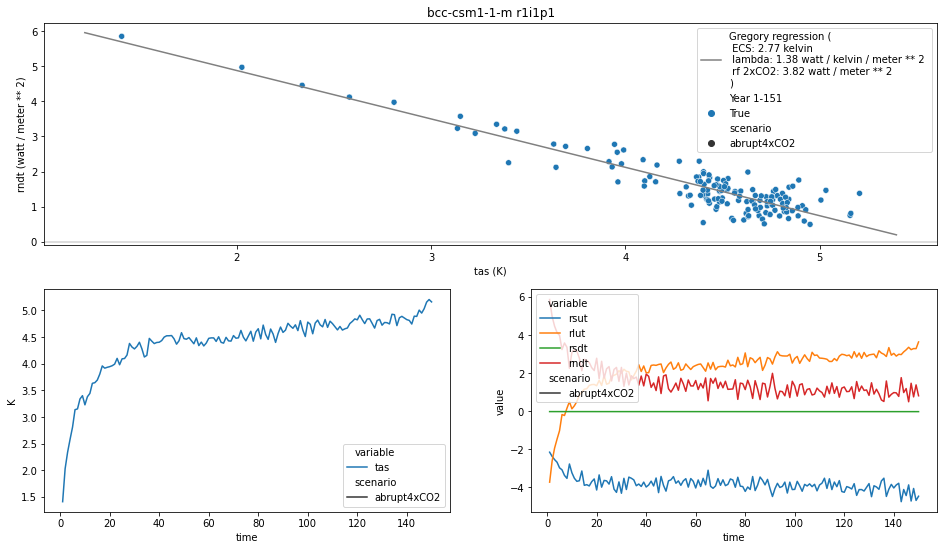

Not all data available for ./ecs_data/average-year-mid-year/cmip5/abrupt-2xCO2/Amon/tas/bcc-csm1-1/r1i1p1/**/NORMED*.MAG
set()
Not all data available for bcc-csm1-1 r1i1p1
Missing abrupt-2xCO2


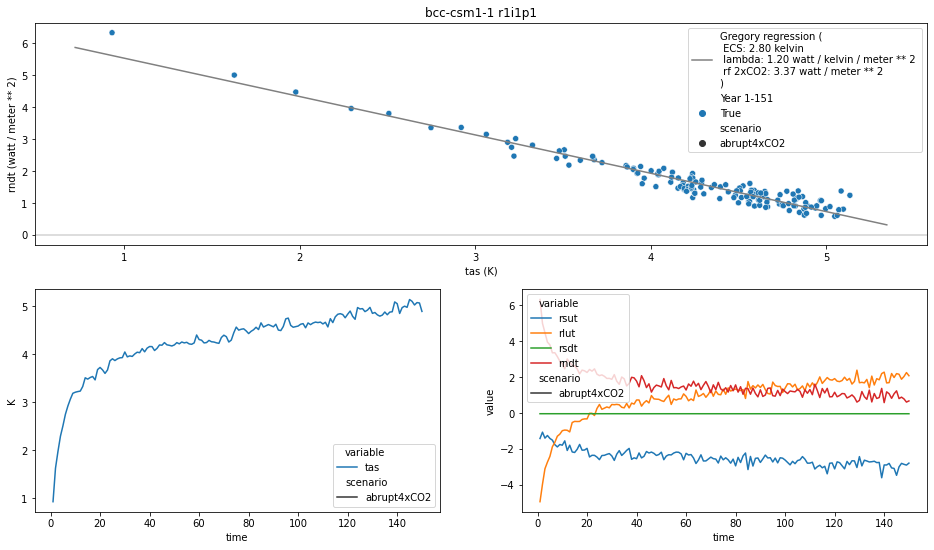

<IPython.core.display.Javascript object>

In [18]:
non_tas_variables_to_load = [
    "rsut",
    "rlut",
    "rsdt",
]

out_table = {}

for f in tqdman.tqdm(abrupt_4xco2_tas_files):
    if "cmip5" in f:
        load_kwargs = dict(drs="MarbleCMIP5")
        cmip6 = False
        abrupt_4xCO2_name = "abrupt4xCO2"
    else:
        load_kwargs = dict(drs="CMIP6Output")
        cmip6 = True
        abrupt_4xCO2_name = "abrupt-4xCO2"

    db = []
    for exp, mip in ((abrupt_4xCO2_name, "/CMIP/"), ("abrupt-2xCO2", "/CFMIP/")):
        glob_to_use = (
            os.path.join(*f.split(os.sep)[:-1], "**", "NORMED*.MAG")
            .replace(abrupt_4xCO2_name, exp)
            .replace("/CMIP/", mip)
        )
        fload = find_file(glob_to_use)

        if fload is None:
            print("Not all data available for {} {}".format(climate_model, member_id))
            print("Missing {}".format(exp))
            continue

        tas = force_first_year(
            netcdf_scm.io.load_mag_file(fload, **load_kwargs)
        ).filter(region="World")
        if tas["year"].max() < 20:
            continue

        assert tas.metadata["normalisation method"] == "21-yr-running-mean"

        climate_model = tas.get_unique_meta("climate_model", no_duplicates=True)
        member_id = tas.get_unique_meta("member_id", no_duplicates=True)

        all_data = True
        db.append(tas)
        for v in non_tas_variables_to_load:
            glob_to_use = os.path.join(
                *fload.split(os.sep)[:-1], "NORMED*.MAG"
            ).replace("tas", v)
            found_files = set(glob.glob(glob_to_use, recursive=True))
            if len(found_files) != 1:
                print(glob_to_use)
                print(
                    "Not all data available for {} {}".format(climate_model, member_id)
                )
                print("Missing {}".format(v))
                all_data = False
                break

            db.append(
                force_first_year(
                    netcdf_scm.io.load_mag_file(
                        list(found_files)[0], **load_kwargs
                    ).filter(region="World")
                )
            )

    if not all_data or not db:
        continue

    db = run_append(db)

    db = db.append(
        db.filter(variable="rsdt")
        .subtract(db.filter(variable="rsut"), op_cols={"variable": "rndt"})
        .subtract(db.filter(variable="rlut"), op_cols={"variable": "rndt"})
    )

    fig = plt.figure(figsize=(16, 9))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

    ax1 = fig.add_subplot(spec[1, 0])
    ax2 = fig.add_subplot(spec[1, 1])
    ax3 = fig.add_subplot(spec[0, :])

    db.filter(variable="tas").time_mean("AC").lineplot(
        hue="variable", time_axis="year", ax=ax1, style="scenario"
    )
    db.filter(variable="r*").time_mean("AC").lineplot(
        hue="variable", time_axis="year", ax=ax2, style="scenario"
    )
    make_gregory_plot(db, ax3, style="scenario")
    ax3.axhline(0, color="lightgray")

    plt.show()

    gv = get_gregory_values(db)
    out_dict = {
        "climate_model": climate_model,
        "member_id": member_id,
        "mip_era": db.get_unique_meta("mip_era", no_duplicates=True),
        **gv,
    }

    for k, v in out_dict.items():
        try:
            val = v.magnitude
            unit = v.units
            key = "{} ({})".format(k, unit)
        except AttributeError:
            key = k
            val = v

        if key in out_table:
            out_table[key].append(val)
        else:
            out_table[key] = [val]

#     break

out_table = pd.DataFrame(out_table)

In [19]:
db.head()

time                                                                                                   0001-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario    unit              variable                        
cmip5       bcc-csm1-1    r1i1p1    CMIP5   unspecified World  abrupt4xCO2 K                 tas                  0.930168   
                                                                           W m^-2            rsut                -1.423050   
                                                                                             rlut                -4.949310   
                                                                                             rsdt                -0.039569   
                                                                           watt / meter ** 2 rndt                 6.332791   

time                                                                                                   0002-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario    unit              variable                        
cmip5       bcc-csm1-1    r1i1p1    CMIP5   unspecified World  abrupt4xCO2 K                 tas                  1.626900   
                                                                           W m^-2            rsut                -1.069040   
                                                                                             rlut                -3.974720   
                                                                                             rsdt                -0.039541   
                                                                           watt / meter ** 2 rndt                 5.004219   

time                                                                                                   0003-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario    unit              variable                        
cmip5       bcc-csm1-1    r1i1p1    CMIP5   unspecified World  abrupt4xCO2 K                 tas                  1.977430   
                                                                           W m^-2            rsut                -1.402340   
                                                                                             rlut                -3.110420   
                                                                                             rsdt                -0.039588   
                                                                           watt / meter ** 2 rndt                 4.473172   

time                                                                                                   0004-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario    unit              variable                        
cmip5       bcc-csm1-1    r1i1p1    CMIP5   unspecified World  abrupt4xCO2 K                 tas                  2.293160   
                                                                           W m^-2            rsut                -1.255380   
                                                                                             rlut                -2.741720   
                                                                                             rsdt                -0.039632   
                                                                           watt / meter ** 2 rndt                 3.957468   

time                                                                                                   0005-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario    unit              variable                        
cmip5       bcc-csm1-1    r1i1p1    CMIP5   unspecified World  abrupt4xCO2 K                 tas                  2.507880   
                                                                           W m^-2         

<IPython.core.display.Javascript object>

In [20]:
out_table.head()

climate_model member_id mip_era  lambda (watt / kelvin / meter ** 2)  \
0  AWI-CM-1-1-MR  r1i1p1f1   CMIP6                             1.148273   
1    BCC-CSM2-MR  r1i1p1f1   CMIP6                             1.132325   
2       BCC-ESM1  r1i1p1f1   CMIP6                             0.860692   
3    CAMS-CSM1-0  r1i1p1f1   CMIP6                             1.820750   
4    CAMS-CSM1-0  r2i1p1f1   CMIP6                             1.831601   

   rf_4xco2 (watt / meter ** 2)  rf_2xco2 (watt / meter ** 2)  ecs (kelvin)  
0                      7.260648                      3.630324      3.161551  
1                      6.673837                      3.336919      2.946963  
2                      5.728468                      2.864234      3.327827  
3                      8.341279                      4.170640      2.290616  
4                      8.392830                      4.196415      2.291119

<IPython.core.display.Javascript object>

In [21]:
len(out_table[out_table["mip_era"] == "CMIP6"]["climate_model"].unique())

28

<IPython.core.display.Javascript object>

In [22]:
len(out_table[out_table["mip_era"] == "CMIP5"]["climate_model"].unique())

21

<IPython.core.display.Javascript object>

In [23]:
len(out_table["climate_model"].unique())

49

<IPython.core.display.Javascript object>

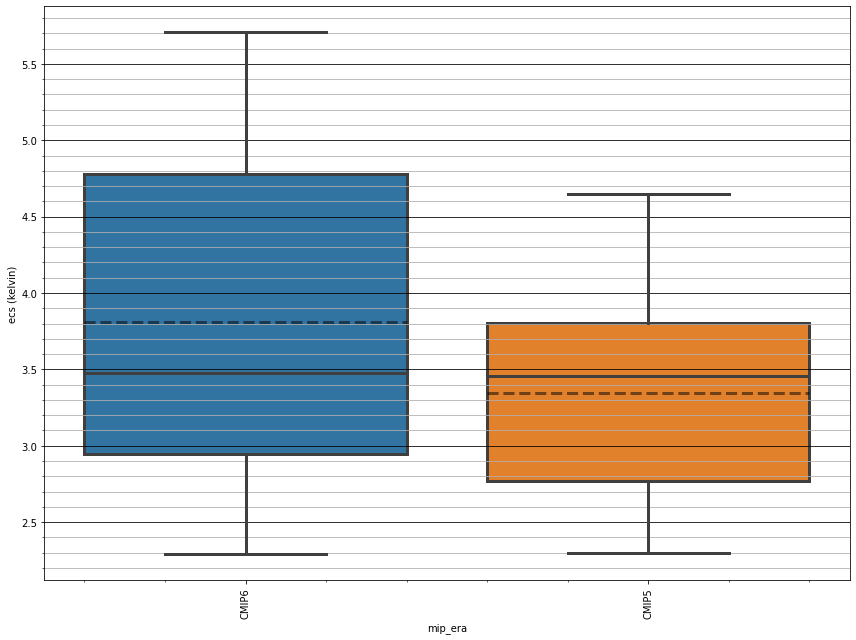

<IPython.core.display.Javascript object>

In [24]:
ax = plt.figure(figsize=(12, 9)).add_subplot(111)
sns.boxplot(
    data=out_table.groupby(["climate_model", "mip_era"]).mean().reset_index(),
    x="mip_era",
    y="ecs (kelvin)",
    linewidth=3,
    meanline=True,
    showmeans=True,
    meanprops={"color": "k", "linestyle": "--", "linewidth": 3, "alpha": 0.5},
    ax=ax,
)
ax.grid(which="major", axis="y", color="k")
ax.grid(which="minor", axis="y")
ax.minorticks_on()
plt.xticks(rotation=90)
plt.tight_layout()

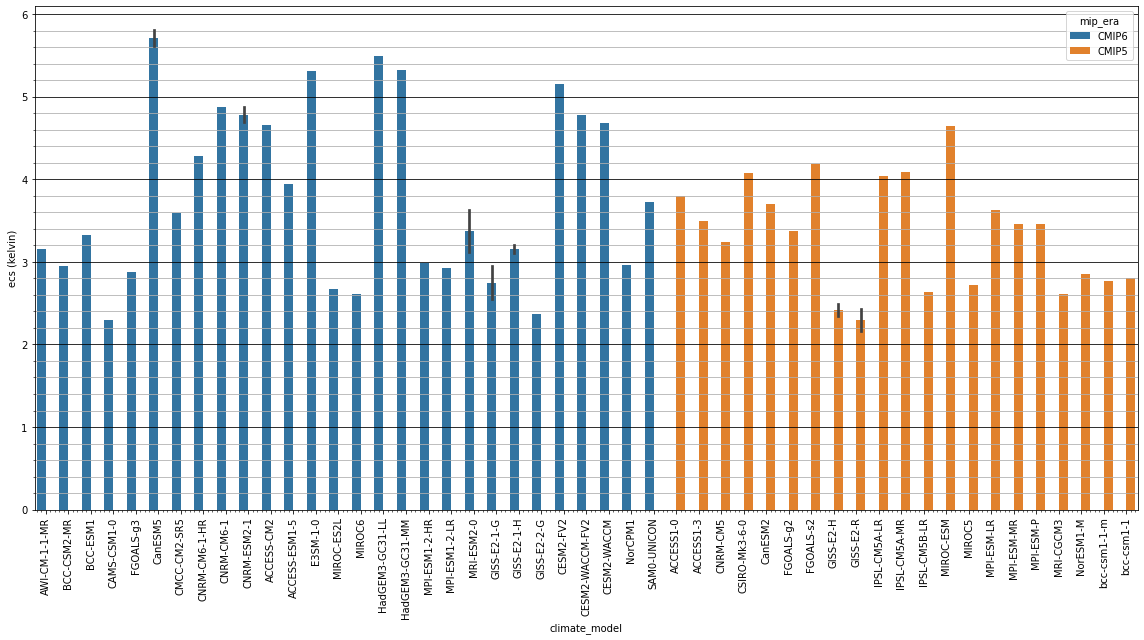

<IPython.core.display.Javascript object>

In [25]:
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
sns.barplot(
    data=out_table, hue="mip_era", x="climate_model", y="ecs (kelvin)", ci="sd", ax=ax
)
ax.grid(which="major", axis="y", color="k")
ax.grid(which="minor", axis="y")
ax.minorticks_on()
plt.xticks(rotation=90)
plt.tight_layout()

In [26]:
(
    out_table.groupby("climate_model").std() / out_table.groupby("climate_model").mean()
).dropna(how="all") * 100

lambda (watt / kelvin / meter ** 2)  \
climate_model                                        
CAMS-CSM1-0                               0.420143   
CNRM-ESM2-1                               6.052267   
CanESM5                                   5.415762   
GISS-E2-1-G                              13.942877   
GISS-E2-1-H                               6.095786   
GISS-E2-H                                 3.052764   
GISS-E2-R                                 7.334353   
MRI-ESM2-0                               24.995835   

               rf_4xco2 (watt / meter ** 2)  rf_2xco2 (watt / meter ** 2)  \
climate_model                                                               
CAMS-CSM1-0                        0.435662                      0.435662   
CNRM-ESM2-1                        3.436913                      3.436913   
CanESM5                            3.011584                      3.011584   
GISS-E2-1-G                       16.680982                     16.680982   
GISS-E2-1-H                        3.943379                      3.943379   
GISS-E2-H                          1.488028                      1.488028   
GISS-E2-R                          0.726649                      0.726649   
MRI-ESM2-0                        16.109355                     16.109355   

               ecs (kelvin)  
climate_model                
CAMS-CSM1-0        0.015520  
CNRM-ESM2-1        2.618076  
CanESM5            2.406140  
GISS-E2-1-G        8.015889  
GISS-E2-1-H        2.154997  
GISS-E2-H          4.539761  
GISS-E2-R          8.058854  
MRI-ESM2-0         8.251827

<IPython.core.display.Javascript object>

In [27]:
out_table

climate_model member_id mip_era  lambda (watt / kelvin / meter ** 2)  \
0   AWI-CM-1-1-MR  r1i1p1f1   CMIP6                             1.148273   
1     BCC-CSM2-MR  r1i1p1f1   CMIP6                             1.132325   
2        BCC-ESM1  r1i1p1f1   CMIP6                             0.860692   
3     CAMS-CSM1-0  r1i1p1f1   CMIP6                             1.820750   
4     CAMS-CSM1-0  r2i1p1f1   CMIP6                             1.831601   
..            ...       ...     ...                                  ...   
59      MPI-ESM-P    r1i1p1   CMIP5                             1.231242   
60      MRI-CGCM3    r1i1p1   CMIP5                             1.223258   
61      NorESM1-M    r1i1p1   CMIP5                             1.044665   
62   bcc-csm1-1-m    r1i1p1   CMIP5                             1.380944   
63     bcc-csm1-1    r1i1p1   CMIP5                             1.201143   

    rf_4xco2 (watt / meter ** 2)  rf_2xco2 (watt / meter ** 2)  ecs (kelvin)  
0                       7.260648                      3.630324      3.161551  
1                       6.673837                      3.336919      2.946963  
2                       5.728468                      2.864234      3.327827  
3                       8.341279                      4.170640      2.290616  
4                       8.392830                      4.196415      2.291119  
..                           ...                           ...           ...  
59                      8.523793                      4.261897      3.461460  
60                      6.391380                      3.195690      2.612442  
61                      5.962849                      2.981424      2.853954  
62                      7.643821                      3.821910      2.767608  
63                      6.733997                      3.366999      2.803162  

[64 rows x 7 columns]

<IPython.core.display.Javascript object>